# Azizi lab
# Lingting Shi 1/6/2023
# Decipher analysis on GVHD project's all T cell data
# Raw counts

In [1]:
#!pip install scdecipher

In [1]:
import warnings; warnings.filterwarnings("ignore") # remove scanpy warnings for the tutorial.

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scanpy as sc
import anndata
import pandas as pd
import matplotlib as mpl
import os
import decipher as dc
dc.pl.activate_journal_quality()


# Set global font sizes
mpl.rcParams.update({'font.size': 14, 'svg.fonttype': 'none'})
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 14      # For x and y axis labels
mpl.rcParams['xtick.labelsize'] = 14     # For x-axis tick labels
mpl.rcParams['ytick.labelsize'] = 14     # For y-axis tick labels  
mpl.rcParams['legend.fontsize'] = 14     # For legend text
mpl.rcParams['legend.title_fontsize'] = 14  # For legend titles


In [3]:
#!pip install scdecipher

In [4]:

pert_type ="crispra" 
outdir = f'/home/user/Documents/Kinase_project/figures/decipher_analysis/NTC_{pert_type}/'

# make the dir if it doesn't exist
if not os.path.exists(outdir):
    os.makedirs(outdir, exist_ok=True)  

In [6]:

PERT_TYPE = pert_type.upper()

In [7]:

base_dir = f"/home/user/Documents/Kinase_project/{pert_type}_final/"
cds_path = f"{base_dir}/{PERT_TYPE}_Figures/NTC_analysis/NTC_filtered_cds.h5ad"
NTC= anndata.read_h5ad(cds_path)

In [8]:
NTC.X.max()

2428.0

In [9]:
# First install pyreadr if you haven't already
#!pip install pyreadr

import pyreadr

# Read the RDS file
result = pyreadr.read_r(f'/home/user/Documents/Kinase_project/{pert_type}_final/{PERT_TYPE}_Figures/NTC_analysis/DEG_testing/NTC_CRISPR_dose_response_diff_test_replicates.rds')

# Since RDS files can contain multiple objects, the result is a dictionary
# If there's only one object (most common case):
data = result[None]  # or result[0]

# If your RDS has named objects:
# data = result['your_object_name']

In [10]:
data.head()

id gene_short_name  num_cells_expressed  \
0  ENSG00000000003.14          TSPAN6                21869   
1  ENSG00000000003.14          TSPAN6                21869   
2  ENSG00000000003.14          TSPAN6                21869   
3  ENSG00000000419.12            DPM1                98111   
4  ENSG00000000419.12            DPM1                98111   

              gene_id status                  term  estimate   std_err  \
0  ENSG00000000003.14     OK           (Intercept) -2.748490  0.041330   
1  ENSG00000000003.14     OK                  dose -0.289421  0.064344   
2  ENSG00000000003.14     OK  replicatereplicate_2  0.056876  0.045955   
3  ENSG00000000419.12     OK           (Intercept) -1.047931  0.017836   
4  ENSG00000000419.12     OK                  dose -0.031958  0.026735   

    test_val   p_value  normalized_effect model_component   q_value  
0 -66.500606  0.000000           0.000000           count  0.000000  
1  -4.498042  0.000007          -0.353569           count  0.000013  
2   1.237635  0.215862           0.071238           count  0.261172  
3 -58.753959  0.000000           0.000000           count  0.000000  
4  -1.195344  0.231963          -0.044807           count  0.278790

In [11]:
T_cell_dose_gene = data[(data['term'] == "dose")  & (data['q_value']<0.05) & (abs(data['normalized_effect'])> 0.25)]['gene_short_name']
##<0.00001 great run
len(T_cell_dose_gene)

4023

In [12]:
T_cell_dose_gene_with_score = data[(data['term'] == "dose")  & (data['q_value']<0.05) & (abs(data['normalized_effect'])> 0.25)]

In [13]:
# sorting by normalized effect
T_cell_dose_gene_with_score = T_cell_dose_gene_with_score.sort_values(by='q_value', ascending=False)
T_cell_dose_gene_with_score

id gene_short_name  num_cells_expressed  \
10966  ENSG00000126106.13          TMEM53                16422   
29290   ENSG00000237596.6      AL138828.1                22718   
29113  ENSG00000232973.11      CYP1B1-AS1                15644   
4237    ENSG00000099860.8         GADD45B                17630   
15823  ENSG00000144331.18         ZNF385B                17290   
...                   ...             ...                  ...   
25954  ENSG00000186088.15            GSAP               132287   
10918   ENSG00000125968.8             ID1               151899   
10822  ENSG00000125730.16              C3               114804   
10669   ENSG00000124882.3            EREG               174959   
16486  ENSG00000147202.17          DIAPH2               214654   

                  gene_id status  term  estimate   std_err   test_val  \
10966  ENSG00000126106.13     OK  dose -0.213552  0.075726  -2.820079   
29290   ENSG00000237596.6     OK  dose  0.232004  0.080718   2.874254   
29113  ENSG00000232973.11     OK  dose -0.224280  0.077832  -2.881580   
4237    ENSG00000099860.8     OK  dose  0.239383  0.081078   2.952516   
15823  ENSG00000144331.18     OK  dose  0.213854  0.072408   2.953451   
...                   ...    ...   ...       ...       ...        ...   
25954  ENSG00000186088.15     OK  dose  0.898977  0.020451  43.956723   
10918   ENSG00000125968.8     OK  dose -1.017831  0.024544 -41.468800   
10822  ENSG00000125730.16     OK  dose  1.146157  0.022914  50.018940   
10669   ENSG00000124882.3     OK  dose  1.040597  0.022820  45.600788   
16486  ENSG00000147202.17     OK  dose  0.557983  0.013774  40.508615   

        p_value  normalized_effect model_component   q_value  
10966  0.004805          -0.251518           count  0.007351  
29290  0.004053           0.304471           count  0.006250  
29113  0.003960          -0.263851           count  0.006111  
4237   0.003155           0.289877           count  0.004916  
15823  0.003145           0.257077           count  0.004903  
...         ...                ...             ...       ...  
25954  0.000000           1.280509           count  0.000000  
10918  0.000000          -1.446004           count  0.000000  
10822  0.000000           1.627468           count  0.000000  
10669  0.000000           1.494027           count  0.000000  
16486  0.000000           0.800462           count  0.000000  

[4023 rows x 13 columns]

In [14]:
T_cell_dose_gene

1            TSPAN6
10              CFH
16             GCLC
22           NIPAL3
40              BAD
            ...    
30961          CDR1
30979    FP565324.1
30988    AC116366.3
30997    AC004922.1
31006    AC119674.2
Name: gene_short_name, Length: 4023, dtype: object

In [15]:
# export T cell dose gene to csv and save i t
# save as csv locally 

T_cell_dose_gene.to_csv(f"{outdir}/T_cell_dose_gene.csv")

T_cell_dose_gene_with_score.to_csv(f"{outdir}/T_cell_dose_gene_with_score.csv")

In [16]:
gene_mask = NTC.var_names.isin(T_cell_dose_gene)

In [17]:
NTC = NTC[:, gene_mask]

In [18]:
NTC.obs['dose']

01A_A01_RT_BC_100_Lig_BC_138    0.00
01A_A01_RT_BC_100_Lig_BC_192    1.00
01A_A01_RT_BC_101_Lig_BC_121    1.00
01A_A01_RT_BC_101_Lig_BC_160    0.25
01A_A01_RT_BC_101_Lig_BC_164    0.25
                                ... 
12A_H12_RT_BC_98_Lig_BC_186     0.50
12A_H12_RT_BC_98_Lig_BC_94      0.00
12A_H12_RT_BC_99_Lig_BC_140     0.25
12A_H12_RT_BC_99_Lig_BC_27      0.50
12A_H12_RT_BC_99_Lig_BC_94      0.00
Name: dose, Length: 27989, dtype: float64

In [19]:
NTC.obs['dosage'] = NTC.obs['dose'].astype(str)

In [20]:
NTC.obs['dosage'].unique()

array(['0.0', '1.0', '0.25', '0.5'], dtype=object)

In [21]:
NTC.obs['dosage'] = pd.Categorical(NTC.obs['dosage'], categories=['0.0','0.25','0.5','1.0'])

In [ ]:
# colors = {'0.0' : '#CAA8F5','0.25':'#9984D4','0.5':'#592E83','1.0' :'#230C33'}
# color_palette = colors

In [ ]:
# colors = {'0.0' : '#A6CEE3','0.25':'#1F78B4','0.5':'#B2DF8A','1.0' :'#33A02C'}
# color_palette = colors

In [7]:
colors = {'0.0' : '#023047','0.25':'#219EBC','0.5':'#FFD166','1.0' : '#FF7F11'}
color_palette = colors


In [25]:
# 0.05 seed 0 looks good, 0.000001 seed 1,2

In [26]:
NTC = NTC[
    (NTC.obs['total_hash_umis_per_cell_ID'] > 3) & 
    (NTC.obs['top_to_second_best_ratio'] > 2)
].copy()
NTC

AnnData object with n_obs × n_vars = 14378 × 4023
    obs: 'P7', 'P5', 'sample', 'n.umi', 'log10.umi', 'percent_mito', 'cell_ID', 'RT', 'Lig', 'new_cell', 'oligo', 'total_reads.x', 'total_hash_umis_per_cell_ID', 'top_to_second_best_ratio', 'treatment', 'sgRNA', 'total_reads.y', 'sgRNA_proportion', 'total_sgrna_read_per_cell', 'rank', 'top_to_second', 'second_to_third', 'third_to_next', 'top_proportion', 'second_proportion', 'third_proportion', 'top_sg', 'second_sg', 'third_sg', 'gene', 'second_sg_gene', 'third_sg_gene', 'cell', 'RT_lig', 'num_genes_expressed', 'Size_Factor', 'gene_id', 'replicate', 'g1s_score', 'g2m_score', 'proliferation_index', 'dose', 'UMAP1', 'UMAP2', 'PCA_Cluster', 'dosage'
    var: 'features'

Epoch 35 (batch 202/202) | | train elbo: 2848.61 (last epoch: 2849.56) | val ll: 2826.80:   4%|▎         | 35/1000 [01:24<39:01,  2.43s/it]2025-12-21 21:45:11,627 | INFO : Early stopping has been triggered.
2025-12-21 21:45:11,876 | INFO : Added `.obsm['decipher_v']`: the Decipher v space.
2025-12-21 21:45:11,877 | INFO : Added `.obsm['decipher_z']`: the Decipher z space.
2025-12-21 21:45:11,878 | INFO : Saving decipher model with run_id 2025-12-21-21-45-11-forward-green-raclette.


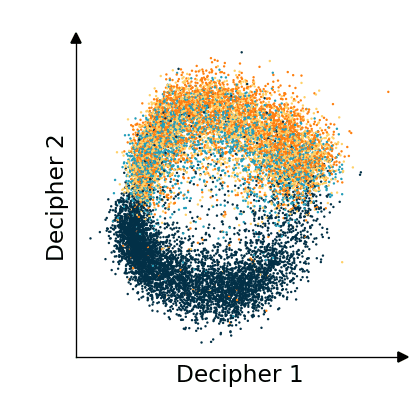

... storing 'P7' as categorical
... storing 'P5' as categorical
... storing 'sample' as categorical
... storing 'RT' as categorical
... storing 'Lig' as categorical
... storing 'oligo' as categorical
... storing 'treatment' as categorical
... storing 'sgRNA' as categorical
... storing 'top_sg' as categorical
... storing 'second_sg' as categorical
... storing 'third_sg' as categorical
... storing 'gene' as categorical
... storing 'second_sg_gene' as categorical
... storing 'third_sg_gene' as categorical
... storing 'RT_lig' as categorical
... storing 'gene_id' as categorical
... storing 'replicate' as categorical


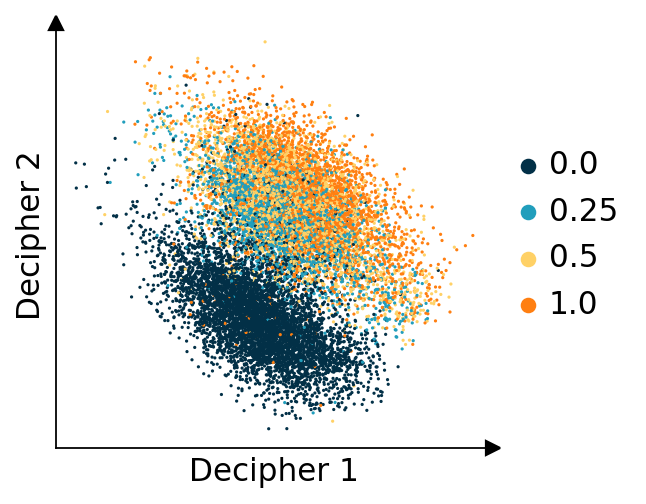

In [27]:
decipher_config = dc.tl.DecipherConfig(seed=1)  # optional Decipher config
#del NTC.uns['decipher']  # remove any previous decipher config
d3, val3 = dc.tl.decipher_train(
    NTC, decipher_config, plot_kwargs={"color": "dosage", "palette": color_palette}, plot_every_k_epochs=1
)

2025-12-21 21:45:12,983 | INFO : Added `.obsm['decipher_v']`: the Decipher v space.
2025-12-21 21:45:12,983 | INFO : Added `.obsm['decipher_z']`: the Decipher z space.


... storing 'P7' as categorical
... storing 'P5' as categorical
... storing 'sample' as categorical
... storing 'RT' as categorical
... storing 'Lig' as categorical
... storing 'oligo' as categorical
... storing 'treatment' as categorical
... storing 'sgRNA' as categorical
... storing 'top_sg' as categorical
... storing 'second_sg' as categorical
... storing 'third_sg' as categorical
... storing 'gene' as categorical
... storing 'second_sg_gene' as categorical
... storing 'third_sg_gene' as categorical
... storing 'RT_lig' as categorical
... storing 'gene_id' as categorical
... storing 'replicate' as categorical
2025-12-21 21:45:13,438 | INFO : maxp pruned
2025-12-21 21:45:13,442 | INFO : cmap pruned
2025-12-21 21:45:13,442 | INFO : kern dropped
2025-12-21 21:45:13,442 | INFO : post pruned
2025-12-21 21:45:13,442 | INFO : FFTM dropped
2025-12-21 21:45:13,443 | INFO : GPOS pruned
2025-12-21 21:45:13,444 | INFO : GSUB pruned
2025-12-21 21:45:13,446 | INFO : glyf pruned
2025-12-21 21:45:1

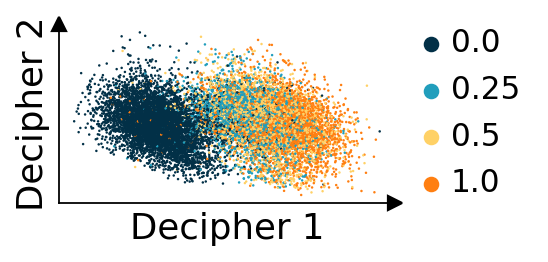

In [28]:
import matplotlib as mpl
mpl.rcParams.update({'font.size': 12, 'svg.fonttype': 'none'})
mpl.rcParams['axes.titlesize'] = 8
mpl.rcParams['xtick.labelsize'] = 8  # Colorbar tick label size
mpl.rcParams['ytick.labelsize'] = 8  # Colorbar tick label size
mpl.rcParams['axes.labelsize'] = 16      # X and Y axis labels - INCREASE THIS

dc.tl.decipher_rotate_space(
    NTC,
        v1_col="dosage",
        v1_order=["0.0", "1.0"],
    )
dc.pl.decipher(NTC, ["dosage"], palette=color_palette,s=5, figsize=(3.6, 1.8))
plt.tight_layout() 

plt.savefig(f'{outdir}/dose_decipher.png', dpi=300)

# Save the plot as PDF
plt.savefig(f'{outdir}/dose_decipher.pdf', dpi=300)

plt.savefig(f'{outdir}/dose_decipher.svg', dpi=300)


2025-12-21 21:45:13,646 | INFO : Trajectory dosage_response : ['0.0', '0.25', '0.5', '1.0'])
2025-12-21 21:45:13,647 | INFO : Added trajectory dosage_response to `adata.uns['decipher']['trajectories']`.
... storing 'P7' as categorical
... storing 'P5' as categorical
... storing 'sample' as categorical
... storing 'RT' as categorical
... storing 'Lig' as categorical
... storing 'oligo' as categorical
... storing 'treatment' as categorical
... storing 'sgRNA' as categorical
... storing 'top_sg' as categorical
... storing 'second_sg' as categorical
... storing 'third_sg' as categorical
... storing 'gene' as categorical
... storing 'second_sg_gene' as categorical
... storing 'third_sg_gene' as categorical
... storing 'RT_lig' as categorical
... storing 'gene_id' as categorical
... storing 'replicate' as categorical
2025-12-21 21:45:14,047 | INFO : maxp pruned
2025-12-21 21:45:14,051 | INFO : cmap pruned
2025-12-21 21:45:14,051 | INFO : kern dropped
2025-12-21 21:45:14,051 | INFO : post pru

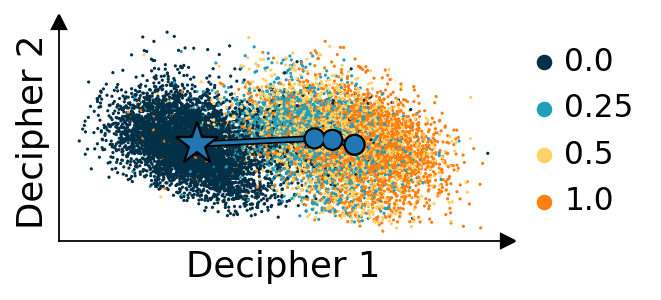

In [29]:
import matplotlib as mpl
mpl.rcParams.update({'font.size': 12, 'svg.fonttype': 'none'})
mpl.rcParams['axes.titlesize'] = 8
mpl.rcParams['xtick.labelsize'] = 8  # Colorbar tick label size
mpl.rcParams['ytick.labelsize'] = 8  # Colorbar tick label size
mpl.rcParams['axes.labelsize'] = 16      # X and Y axis labels - INCREASE THIS

NTC.obs['decipher_clusters'] = NTC.obs["dosage"]
dc.tl.trajectories(
        NTC,
        dc.tl.TConfig("dosage_response", start_cluster_or_marker='0.0', end_cluster_or_marker='1.0')
    )
fig = dc.pl.trajectories(NTC, "dosage", palette=colors)
#plt.tight_layout() 
fig.set_size_inches(3.6, 1.8)
plt.savefig(f'{outdir}/dose_decipher_traj.png', dpi=300, bbox_inches='tight')

# Save the plot as PDF
plt.savefig(f'{outdir}/dose_decipher_traj.pdf', dpi=300, bbox_inches='tight')

plt.savefig(f'{outdir}/dose_decipher_traj.svg', dpi=300, bbox_inches='tight')



2025-12-21 21:45:14,295 | INFO : Added `.obs['decipher_time']`: the decipher time of each cell.


... storing 'P7' as categorical
... storing 'P5' as categorical
... storing 'sample' as categorical
... storing 'RT' as categorical
... storing 'Lig' as categorical
... storing 'oligo' as categorical
... storing 'treatment' as categorical
... storing 'sgRNA' as categorical
... storing 'top_sg' as categorical
... storing 'second_sg' as categorical
... storing 'third_sg' as categorical
... storing 'gene' as categorical
... storing 'second_sg_gene' as categorical
... storing 'third_sg_gene' as categorical
... storing 'RT_lig' as categorical
... storing 'gene_id' as categorical
... storing 'replicate' as categorical
2025-12-21 21:45:14,652 | INFO : maxp pruned
2025-12-21 21:45:14,655 | INFO : cmap pruned
2025-12-21 21:45:14,656 | INFO : kern dropped
2025-12-21 21:45:14,656 | INFO : post pruned
2025-12-21 21:45:14,656 | INFO : FFTM dropped
2025-12-21 21:45:14,657 | INFO : GPOS pruned
2025-12-21 21:45:14,658 | INFO : GSUB pruned
2025-12-21 21:45:14,660 | INFO : glyf pruned
2025-12-21 21:45:1

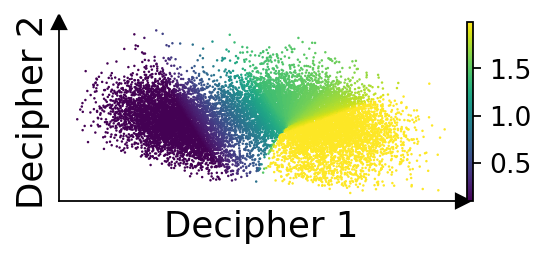

In [30]:
import matplotlib as mpl
mpl.rcParams.update({'font.size': 12, 'svg.fonttype': 'none'})
mpl.rcParams['axes.titlesize'] = 8
mpl.rcParams['xtick.labelsize'] = 12  # Colorbar tick label size
mpl.rcParams['ytick.labelsize'] = 12  # Colorbar tick label size
mpl.rcParams['axes.labelsize'] = 16
mpl.rcParams['lines.linewidth'] = 2  # Correct parameter name
dc.tl.decipher_time(NTC)
dc.pl.decipher_time(NTC,s=5,figsize=(3.6, 1.8))

plt.tight_layout() 
plt.savefig(f'{outdir}/dose_deciphertime.png', dpi=300)

# Save the plot as PDF
plt.savefig(f'{outdir}/dose_deciphertime.pdf', dpi=300)

# Save the plot as PDF
plt.savefig(f'{outdir}/dose_deciphertime.svg', dpi=300)



2025-12-21 21:45:15,001 | INFO : maxp pruned
2025-12-21 21:45:15,004 | INFO : cmap pruned
2025-12-21 21:45:15,004 | INFO : kern dropped
2025-12-21 21:45:15,004 | INFO : post pruned
2025-12-21 21:45:15,004 | INFO : FFTM dropped
2025-12-21 21:45:15,006 | INFO : GPOS pruned
2025-12-21 21:45:15,007 | INFO : GSUB pruned
2025-12-21 21:45:15,009 | INFO : glyf pruned
2025-12-21 21:45:15,010 | INFO : Added gid0 to subset
2025-12-21 21:45:15,010 | INFO : Added first four glyphs to subset
2025-12-21 21:45:15,010 | INFO : Closing glyph list over 'GSUB': 26 glyphs before
2025-12-21 21:45:15,010 | INFO : Glyph names: ['.notdef', '.null', 'D', 'a', 'c', 'd', 'e', 'five', 'g', 'h', 'i', 'm', 'n', 'nonmarkingreturn', 'o', 'one', 'p', 'period', 'r', 's', 'space', 't', 'two', 'underscore', 'y', 'zero']
2025-12-21 21:45:15,010 | INFO : Glyph IDs:   [0, 1, 2, 3, 17, 19, 20, 21, 24, 39, 66, 68, 70, 71, 72, 74, 75, 76, 80, 81, 82, 83, 85, 86, 87, 92]
2025-12-21 21:45:15,011 | INFO : Closed glyph list over 'G

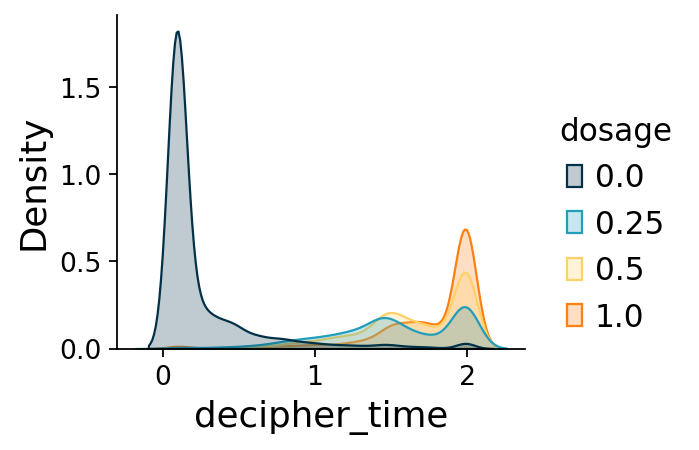

In [31]:
data = pd.DataFrame()
data['dosage'] = NTC.obs['dosage']
data['decipher_1'] = NTC.obsm['decipher_v'][:,0]
data['decipher_2'] = NTC.obsm['decipher_v'][:,1]
data['decipher_time'] = NTC.obs['decipher_time']

# Plot density plots for different categories
#sns.displot(data, x="decipher_time", hue="grade_of_GVHD", kind="kde", fill=True)
g = sns.displot(data, x="decipher_time", hue="dosage", kind="kde", fill=True, palette=colors, height=3, aspect=1.2)
# Save the plot as PNG

g.savefig(f'{outdir}/traj_displot.png', dpi=300)

# Save the plot as PDF
g.savefig(f'{outdir}/traj_displot.pdf', dpi=300)
g.savefig(f'{outdir}/traj_displot.svg', dpi=300)

In [32]:
dc.tl.gene_patterns(NTC)

2025-12-24 00:58:06,380 | INFO : maxp pruned
2025-12-24 00:58:06,384 | INFO : cmap pruned
2025-12-24 00:58:06,384 | INFO : kern dropped
2025-12-24 00:58:06,384 | INFO : post pruned
2025-12-24 00:58:06,385 | INFO : FFTM dropped
2025-12-24 00:58:06,386 | INFO : GPOS pruned
2025-12-24 00:58:06,387 | INFO : GSUB pruned
2025-12-24 00:58:06,389 | INFO : glyf pruned
2025-12-24 00:58:06,390 | INFO : Added gid0 to subset
2025-12-24 00:58:06,390 | INFO : Added first four glyphs to subset
2025-12-24 00:58:06,390 | INFO : Closing glyph list over 'GSUB': 24 glyphs before
2025-12-24 00:58:06,391 | INFO : Glyph names: ['.notdef', '.null', 'D', 'G', 'O', 'S', 'c', 'e', 'h', 'i', 'm', 'n', 'nonmarkingreturn', 'o', 'one', 'p', 'r', 's', 'space', 't', 'three', 'two', 'x', 'zero']
2025-12-24 00:58:06,392 | INFO : Glyph IDs:   [0, 1, 2, 3, 19, 20, 21, 22, 39, 42, 50, 54, 70, 72, 75, 76, 80, 81, 82, 83, 85, 86, 87, 91]
2025-12-24 00:58:06,393 | INFO : Closed glyph list over 'GSUB': 24 glyphs after
2025-12-2

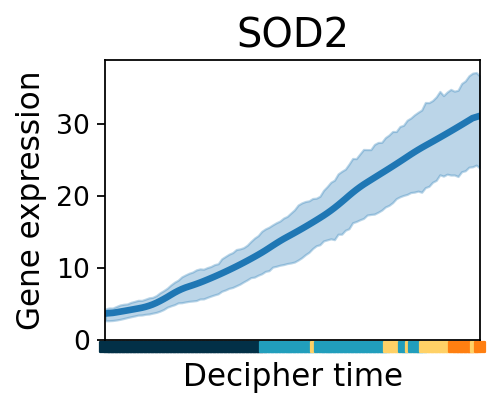

2025-12-24 00:58:06,513 | INFO : maxp pruned
2025-12-24 00:58:06,516 | INFO : cmap pruned
2025-12-24 00:58:06,516 | INFO : kern dropped
2025-12-24 00:58:06,516 | INFO : post pruned
2025-12-24 00:58:06,516 | INFO : FFTM dropped
2025-12-24 00:58:06,517 | INFO : GPOS pruned
2025-12-24 00:58:06,518 | INFO : GSUB pruned
2025-12-24 00:58:06,520 | INFO : glyf pruned
2025-12-24 00:58:06,520 | INFO : Added gid0 to subset
2025-12-24 00:58:06,520 | INFO : Added first four glyphs to subset
2025-12-24 00:58:06,520 | INFO : Closing glyph list over 'GSUB': 26 glyphs before
2025-12-24 00:58:06,520 | INFO : Glyph names: ['.notdef', '.null', 'C', 'D', 'F', 'G', 'S', 'c', 'e', 'four', 'h', 'i', 'm', 'n', 'nonmarkingreturn', 'o', 'one', 'p', 'r', 's', 'space', 't', 'three', 'two', 'x', 'zero']
2025-12-24 00:58:06,521 | INFO : Glyph IDs:   [0, 1, 2, 3, 19, 20, 21, 22, 23, 38, 39, 41, 42, 54, 70, 72, 75, 76, 80, 81, 82, 83, 85, 86, 87, 91]
2025-12-24 00:58:06,522 | INFO : Closed glyph list over 'GSUB': 26 g

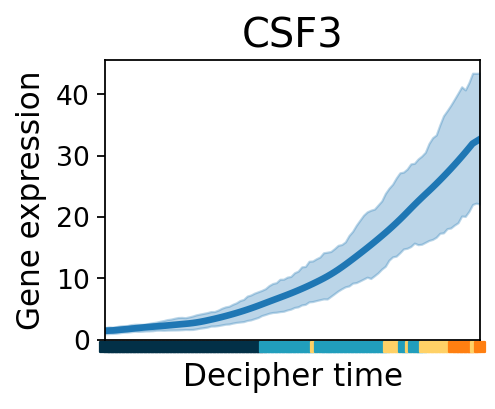

2025-12-24 00:58:06,632 | INFO : maxp pruned
2025-12-24 00:58:06,635 | INFO : cmap pruned
2025-12-24 00:58:06,635 | INFO : kern dropped
2025-12-24 00:58:06,635 | INFO : post pruned
2025-12-24 00:58:06,635 | INFO : FFTM dropped
2025-12-24 00:58:06,636 | INFO : GPOS pruned
2025-12-24 00:58:06,637 | INFO : GSUB pruned
2025-12-24 00:58:06,639 | INFO : glyf pruned
2025-12-24 00:58:06,639 | INFO : Added gid0 to subset
2025-12-24 00:58:06,639 | INFO : Added first four glyphs to subset
2025-12-24 00:58:06,639 | INFO : Closing glyph list over 'GSUB': 25 glyphs before
2025-12-24 00:58:06,639 | INFO : Glyph names: ['.notdef', '.null', 'D', 'G', 'I', 'O', 'c', 'e', 'five', 'h', 'i', 'm', 'n', 'nonmarkingreturn', 'o', 'one', 'p', 'period', 'r', 's', 'space', 't', 'two', 'x', 'zero']
2025-12-24 00:58:06,640 | INFO : Glyph IDs:   [0, 1, 2, 3, 17, 19, 20, 21, 24, 39, 42, 44, 50, 70, 72, 75, 76, 80, 81, 82, 83, 85, 86, 87, 91]
2025-12-24 00:58:06,641 | INFO : Closed glyph list over 'GSUB': 25 glyphs af

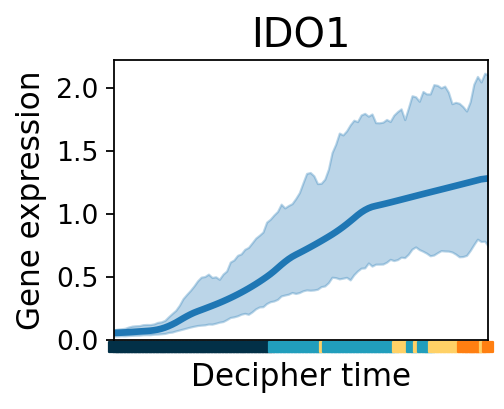

2025-12-24 00:58:06,750 | INFO : maxp pruned
2025-12-24 00:58:06,753 | INFO : cmap pruned
2025-12-24 00:58:06,753 | INFO : kern dropped
2025-12-24 00:58:06,754 | INFO : post pruned
2025-12-24 00:58:06,754 | INFO : FFTM dropped
2025-12-24 00:58:06,754 | INFO : GPOS pruned
2025-12-24 00:58:06,756 | INFO : GSUB pruned
2025-12-24 00:58:06,758 | INFO : glyf pruned
2025-12-24 00:58:06,758 | INFO : Added gid0 to subset
2025-12-24 00:58:06,758 | INFO : Added first four glyphs to subset
2025-12-24 00:58:06,758 | INFO : Closing glyph list over 'GSUB': 26 glyphs before
2025-12-24 00:58:06,758 | INFO : Glyph names: ['.notdef', '.null', 'C', 'D', 'G', 'c', 'e', 'five', 'four', 'h', 'i', 'm', 'n', 'nonmarkingreturn', 'o', 'one', 'p', 'period', 'r', 's', 'seven', 'space', 't', 'two', 'x', 'zero']
2025-12-24 00:58:06,759 | INFO : Glyph IDs:   [0, 1, 2, 3, 17, 19, 20, 21, 23, 24, 26, 38, 39, 42, 70, 72, 75, 76, 80, 81, 82, 83, 85, 86, 87, 91]
2025-12-24 00:58:06,760 | INFO : Closed glyph list over 'GSU

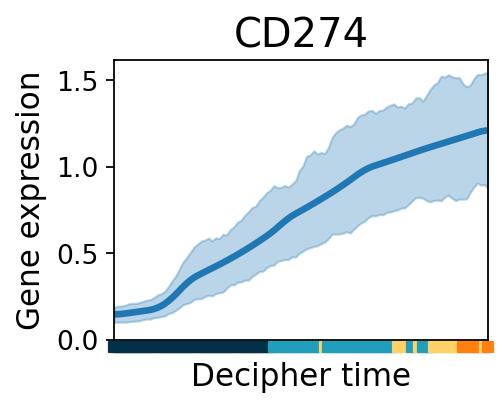

2025-12-24 00:58:06,867 | INFO : maxp pruned
2025-12-24 00:58:06,870 | INFO : cmap pruned
2025-12-24 00:58:06,870 | INFO : kern dropped
2025-12-24 00:58:06,870 | INFO : post pruned
2025-12-24 00:58:06,870 | INFO : FFTM dropped
2025-12-24 00:58:06,871 | INFO : GPOS pruned
2025-12-24 00:58:06,873 | INFO : GSUB pruned
2025-12-24 00:58:06,874 | INFO : glyf pruned
2025-12-24 00:58:06,875 | INFO : Added gid0 to subset
2025-12-24 00:58:06,875 | INFO : Added first four glyphs to subset
2025-12-24 00:58:06,875 | INFO : Closing glyph list over 'GSUB': 25 glyphs before
2025-12-24 00:58:06,875 | INFO : Glyph names: ['.notdef', '.null', 'C', 'D', 'G', 'L', 'P', 'c', 'e', 'h', 'i', 'm', 'n', 'nonmarkingreturn', 'o', 'one', 'p', 'r', 's', 'space', 't', 'three', 'two', 'x', 'zero']
2025-12-24 00:58:06,875 | INFO : Glyph IDs:   [0, 1, 2, 3, 19, 20, 21, 22, 38, 39, 42, 47, 51, 70, 72, 75, 76, 80, 81, 82, 83, 85, 86, 87, 91]
2025-12-24 00:58:06,876 | INFO : Closed glyph list over 'GSUB': 25 glyphs after


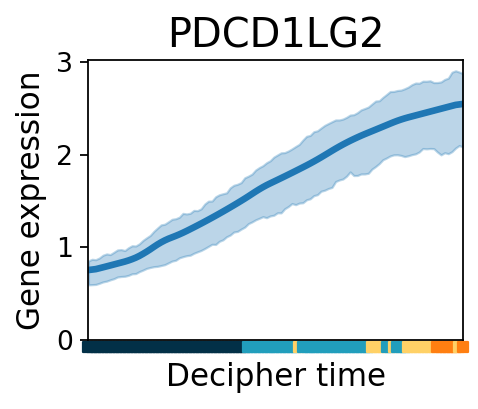

2025-12-24 00:58:06,984 | INFO : maxp pruned
2025-12-24 00:58:06,987 | INFO : cmap pruned
2025-12-24 00:58:06,987 | INFO : kern dropped
2025-12-24 00:58:06,987 | INFO : post pruned
2025-12-24 00:58:06,987 | INFO : FFTM dropped
2025-12-24 00:58:06,988 | INFO : GPOS pruned
2025-12-24 00:58:07,154 | INFO : GSUB pruned
2025-12-24 00:58:07,156 | INFO : glyf pruned
2025-12-24 00:58:07,157 | INFO : Added gid0 to subset
2025-12-24 00:58:07,157 | INFO : Added first four glyphs to subset
2025-12-24 00:58:07,157 | INFO : Closing glyph list over 'GSUB': 25 glyphs before
2025-12-24 00:58:07,157 | INFO : Glyph names: ['.notdef', '.null', 'D', 'E', 'G', 'P', 'c', 'e', 'four', 'h', 'i', 'm', 'n', 'nonmarkingreturn', 'o', 'one', 'p', 'r', 's', 'six', 'space', 't', 'two', 'x', 'zero']
2025-12-24 00:58:07,158 | INFO : Glyph IDs:   [0, 1, 2, 3, 19, 20, 21, 23, 25, 39, 40, 42, 51, 70, 72, 75, 76, 80, 81, 82, 83, 85, 86, 87, 91]
2025-12-24 00:58:07,159 | INFO : Closed glyph list over 'GSUB': 25 glyphs after

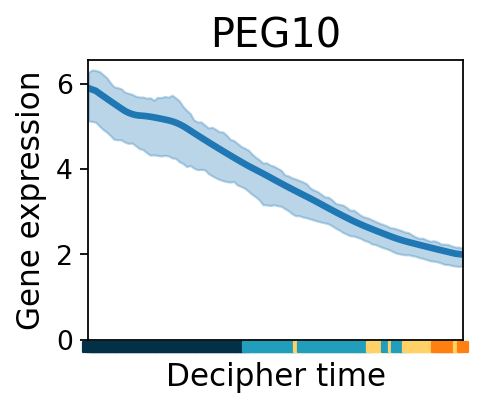

2025-12-24 00:58:07,271 | INFO : maxp pruned
2025-12-24 00:58:07,274 | INFO : cmap pruned
2025-12-24 00:58:07,274 | INFO : kern dropped
2025-12-24 00:58:07,274 | INFO : post pruned
2025-12-24 00:58:07,275 | INFO : FFTM dropped
2025-12-24 00:58:07,275 | INFO : GPOS pruned
2025-12-24 00:58:07,276 | INFO : GSUB pruned
2025-12-24 00:58:07,279 | INFO : glyf pruned
2025-12-24 00:58:07,279 | INFO : Added gid0 to subset
2025-12-24 00:58:07,279 | INFO : Added first four glyphs to subset
2025-12-24 00:58:07,279 | INFO : Closing glyph list over 'GSUB': 24 glyphs before
2025-12-24 00:58:07,279 | INFO : Glyph names: ['.notdef', '.null', 'A', 'D', 'G', 'R', 'c', 'e', 'h', 'i', 'm', 'n', 'nonmarkingreturn', 'o', 'one', 'p', 'r', 's', 'space', 't', 'three', 'two', 'x', 'zero']
2025-12-24 00:58:07,280 | INFO : Glyph IDs:   [0, 1, 2, 3, 19, 20, 21, 22, 36, 39, 42, 53, 70, 72, 75, 76, 80, 81, 82, 83, 85, 86, 87, 91]
2025-12-24 00:58:07,281 | INFO : Closed glyph list over 'GSUB': 24 glyphs after
2025-12-2

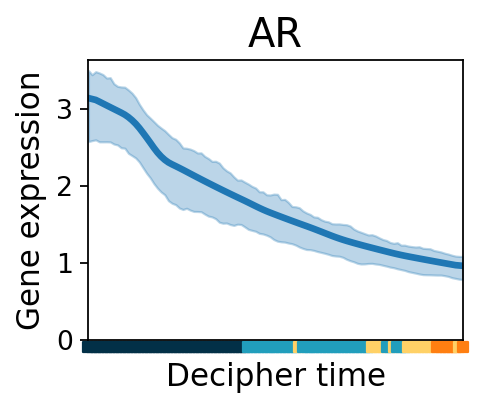

2025-12-24 00:58:07,389 | INFO : maxp pruned
2025-12-24 00:58:07,392 | INFO : cmap pruned
2025-12-24 00:58:07,393 | INFO : kern dropped
2025-12-24 00:58:07,393 | INFO : post pruned
2025-12-24 00:58:07,393 | INFO : FFTM dropped
2025-12-24 00:58:07,394 | INFO : GPOS pruned
2025-12-24 00:58:07,395 | INFO : GSUB pruned
2025-12-24 00:58:07,397 | INFO : glyf pruned
2025-12-24 00:58:07,398 | INFO : Added gid0 to subset
2025-12-24 00:58:07,398 | INFO : Added first four glyphs to subset
2025-12-24 00:58:07,398 | INFO : Closing glyph list over 'GSUB': 27 glyphs before
2025-12-24 00:58:07,398 | INFO : Glyph names: ['.notdef', '.null', 'D', 'G', 'R', 'T', 'W', 'c', 'e', 'five', 'h', 'i', 'm', 'n', 'nonmarkingreturn', 'o', 'one', 'p', 'period', 'r', 's', 'seven', 'space', 't', 'two', 'x', 'zero']
2025-12-24 00:58:07,398 | INFO : Glyph IDs:   [0, 1, 2, 3, 17, 19, 20, 21, 24, 26, 39, 42, 53, 55, 58, 70, 72, 75, 76, 80, 81, 82, 83, 85, 86, 87, 91]
2025-12-24 00:58:07,399 | INFO : Closed glyph list ove

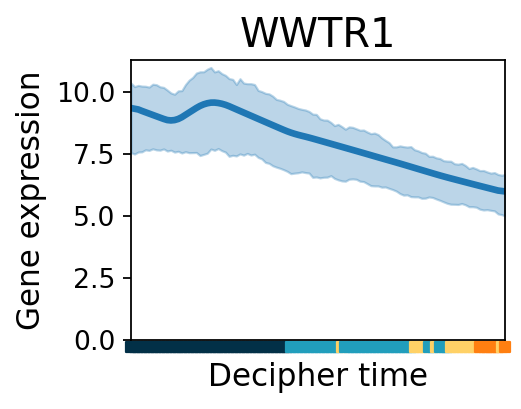

2025-12-24 00:58:07,513 | INFO : maxp pruned
2025-12-24 00:58:07,516 | INFO : cmap pruned
2025-12-24 00:58:07,516 | INFO : kern dropped
2025-12-24 00:58:07,517 | INFO : post pruned
2025-12-24 00:58:07,517 | INFO : FFTM dropped
2025-12-24 00:58:07,517 | INFO : GPOS pruned
2025-12-24 00:58:07,519 | INFO : GSUB pruned
2025-12-24 00:58:07,522 | INFO : glyf pruned
2025-12-24 00:58:07,522 | INFO : Added gid0 to subset
2025-12-24 00:58:07,522 | INFO : Added first four glyphs to subset
2025-12-24 00:58:07,522 | INFO : Closing glyph list over 'GSUB': 25 glyphs before
2025-12-24 00:58:07,522 | INFO : Glyph names: ['.notdef', '.null', 'D', 'G', 'I', 'c', 'e', 'five', 'h', 'i', 'm', 'n', 'nonmarkingreturn', 'o', 'one', 'p', 'period', 'r', 's', 'seven', 'space', 't', 'two', 'x', 'zero']
2025-12-24 00:58:07,523 | INFO : Glyph IDs:   [0, 1, 2, 3, 17, 19, 20, 21, 24, 26, 39, 42, 44, 70, 72, 75, 76, 80, 81, 82, 83, 85, 86, 87, 91]
2025-12-24 00:58:07,524 | INFO : Closed glyph list over 'GSUB': 25 glyph

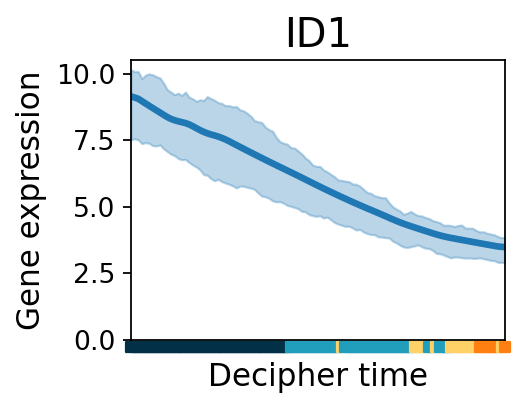

2025-12-24 00:58:07,637 | INFO : maxp pruned
2025-12-24 00:58:07,641 | INFO : cmap pruned
2025-12-24 00:58:07,641 | INFO : kern dropped
2025-12-24 00:58:07,641 | INFO : post pruned
2025-12-24 00:58:07,641 | INFO : FFTM dropped
2025-12-24 00:58:07,642 | INFO : GPOS pruned
2025-12-24 00:58:07,643 | INFO : GSUB pruned
2025-12-24 00:58:07,644 | INFO : glyf pruned
2025-12-24 00:58:07,645 | INFO : Added gid0 to subset
2025-12-24 00:58:07,645 | INFO : Added first four glyphs to subset
2025-12-24 00:58:07,645 | INFO : Closing glyph list over 'GSUB': 26 glyphs before
2025-12-24 00:58:07,645 | INFO : Glyph names: ['.notdef', '.null', 'C', 'D', 'G', 'X', 'c', 'e', 'eight', 'five', 'four', 'h', 'i', 'm', 'n', 'nonmarkingreturn', 'o', 'p', 'r', 's', 'six', 'space', 't', 'two', 'x', 'zero']
2025-12-24 00:58:07,645 | INFO : Glyph IDs:   [0, 1, 2, 3, 19, 21, 23, 24, 25, 27, 38, 39, 42, 59, 70, 72, 75, 76, 80, 81, 82, 83, 85, 86, 87, 91]
2025-12-24 00:58:07,646 | INFO : Closed glyph list over 'GSUB': 2

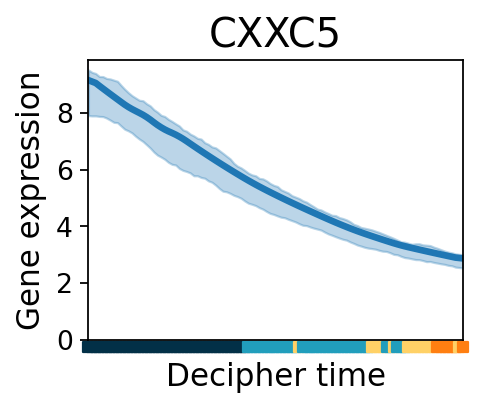

2025-12-24 00:58:07,754 | INFO : maxp pruned
2025-12-24 00:58:07,757 | INFO : cmap pruned
2025-12-24 00:58:07,757 | INFO : kern dropped
2025-12-24 00:58:07,757 | INFO : post pruned
2025-12-24 00:58:07,757 | INFO : FFTM dropped
2025-12-24 00:58:07,758 | INFO : GPOS pruned
2025-12-24 00:58:07,759 | INFO : GSUB pruned
2025-12-24 00:58:07,761 | INFO : glyf pruned
2025-12-24 00:58:07,761 | INFO : Added gid0 to subset
2025-12-24 00:58:07,762 | INFO : Added first four glyphs to subset
2025-12-24 00:58:07,762 | INFO : Closing glyph list over 'GSUB': 26 glyphs before
2025-12-24 00:58:07,762 | INFO : Glyph names: ['.notdef', '.null', 'A', 'C', 'D', 'G', 'L', 'O', 'c', 'e', 'five', 'h', 'i', 'm', 'n', 'nonmarkingreturn', 'o', 'one', 'p', 'r', 's', 'space', 't', 'two', 'x', 'zero']
2025-12-24 00:58:07,762 | INFO : Glyph IDs:   [0, 1, 2, 3, 19, 20, 21, 24, 36, 38, 39, 42, 47, 50, 70, 72, 75, 76, 80, 81, 82, 83, 85, 86, 87, 91]
2025-12-24 00:58:07,763 | INFO : Closed glyph list over 'GSUB': 26 glyph

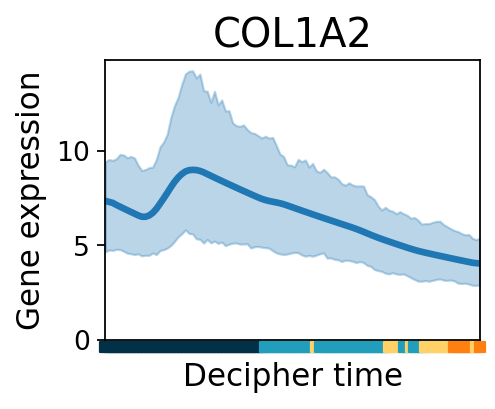

2025-12-24 00:58:07,869 | INFO : maxp pruned
2025-12-24 00:58:07,872 | INFO : cmap pruned
2025-12-24 00:58:07,872 | INFO : kern dropped
2025-12-24 00:58:07,872 | INFO : post pruned
2025-12-24 00:58:07,872 | INFO : FFTM dropped
2025-12-24 00:58:07,873 | INFO : GPOS pruned
2025-12-24 00:58:07,874 | INFO : GSUB pruned
2025-12-24 00:58:07,876 | INFO : glyf pruned
2025-12-24 00:58:07,877 | INFO : Added gid0 to subset
2025-12-24 00:58:07,877 | INFO : Added first four glyphs to subset
2025-12-24 00:58:07,877 | INFO : Closing glyph list over 'GSUB': 26 glyphs before
2025-12-24 00:58:07,877 | INFO : Glyph names: ['.notdef', '.null', 'A', 'D', 'G', 'P', 'T', 'c', 'e', 'four', 'h', 'i', 'm', 'n', 'nonmarkingreturn', 'o', 'one', 'p', 'r', 's', 'six', 'space', 't', 'two', 'x', 'zero']
2025-12-24 00:58:07,877 | INFO : Glyph IDs:   [0, 1, 2, 3, 19, 20, 21, 23, 25, 36, 39, 42, 51, 55, 70, 72, 75, 76, 80, 81, 82, 83, 85, 86, 87, 91]
2025-12-24 00:58:07,878 | INFO : Closed glyph list over 'GSUB': 26 gly

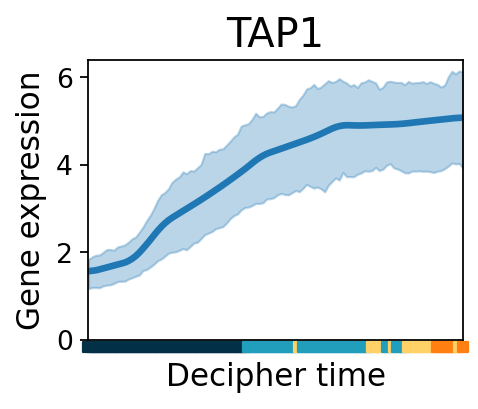

2025-12-24 00:58:07,986 | INFO : maxp pruned
2025-12-24 00:58:07,989 | INFO : cmap pruned
2025-12-24 00:58:07,989 | INFO : kern dropped
2025-12-24 00:58:07,989 | INFO : post pruned
2025-12-24 00:58:07,989 | INFO : FFTM dropped
2025-12-24 00:58:07,990 | INFO : GPOS pruned
2025-12-24 00:58:07,991 | INFO : GSUB pruned
2025-12-24 00:58:07,993 | INFO : glyf pruned
2025-12-24 00:58:07,994 | INFO : Added gid0 to subset
2025-12-24 00:58:07,994 | INFO : Added first four glyphs to subset
2025-12-24 00:58:07,994 | INFO : Closing glyph list over 'GSUB': 26 glyphs before
2025-12-24 00:58:07,994 | INFO : Glyph names: ['.notdef', '.null', 'A', 'C', 'D', 'G', 'I', 'M', 'c', 'e', 'five', 'h', 'i', 'm', 'n', 'nonmarkingreturn', 'o', 'one', 'p', 'r', 's', 'space', 't', 'two', 'x', 'zero']
2025-12-24 00:58:07,994 | INFO : Glyph IDs:   [0, 1, 2, 3, 19, 20, 21, 24, 36, 38, 39, 42, 44, 48, 70, 72, 75, 76, 80, 81, 82, 83, 85, 86, 87, 91]
2025-12-24 00:58:07,995 | INFO : Closed glyph list over 'GSUB': 26 glyph

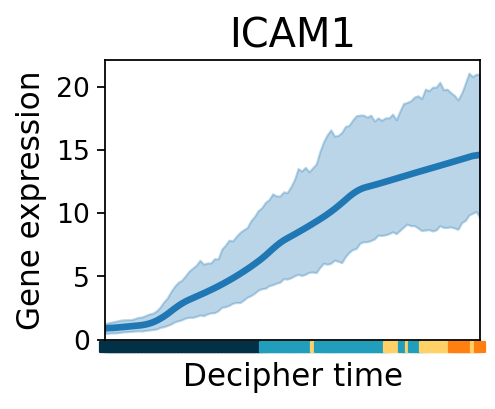

2025-12-24 00:58:08,106 | INFO : maxp pruned
2025-12-24 00:58:08,109 | INFO : cmap pruned
2025-12-24 00:58:08,109 | INFO : kern dropped
2025-12-24 00:58:08,110 | INFO : post pruned
2025-12-24 00:58:08,110 | INFO : FFTM dropped
2025-12-24 00:58:08,110 | INFO : GPOS pruned
2025-12-24 00:58:08,112 | INFO : GSUB pruned
2025-12-24 00:58:08,113 | INFO : glyf pruned
2025-12-24 00:58:08,114 | INFO : Added gid0 to subset
2025-12-24 00:58:08,114 | INFO : Added first four glyphs to subset
2025-12-24 00:58:08,114 | INFO : Closing glyph list over 'GSUB': 25 glyphs before
2025-12-24 00:58:08,114 | INFO : Glyph names: ['.notdef', '.null', 'C', 'D', 'G', 'L', 'X', 'c', 'e', 'h', 'i', 'm', 'n', 'nonmarkingreturn', 'o', 'one', 'p', 'r', 's', 'space', 't', 'three', 'two', 'x', 'zero']
2025-12-24 00:58:08,114 | INFO : Glyph IDs:   [0, 1, 2, 3, 19, 20, 21, 22, 38, 39, 42, 47, 59, 70, 72, 75, 76, 80, 81, 82, 83, 85, 86, 87, 91]
2025-12-24 00:58:08,115 | INFO : Closed glyph list over 'GSUB': 25 glyphs after


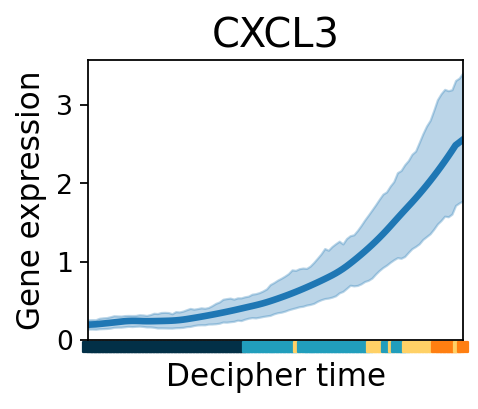

2025-12-24 00:58:08,397 | INFO : maxp pruned
2025-12-24 00:58:08,401 | INFO : cmap pruned
2025-12-24 00:58:08,401 | INFO : kern dropped
2025-12-24 00:58:08,401 | INFO : post pruned
2025-12-24 00:58:08,401 | INFO : FFTM dropped
2025-12-24 00:58:08,402 | INFO : GPOS pruned
2025-12-24 00:58:08,403 | INFO : GSUB pruned
2025-12-24 00:58:08,405 | INFO : glyf pruned
2025-12-24 00:58:08,405 | INFO : Added gid0 to subset
2025-12-24 00:58:08,405 | INFO : Added first four glyphs to subset
2025-12-24 00:58:08,405 | INFO : Closing glyph list over 'GSUB': 24 glyphs before
2025-12-24 00:58:08,405 | INFO : Glyph names: ['.notdef', '.null', 'C', 'D', 'G', 'L', 'X', 'c', 'e', 'four', 'h', 'i', 'm', 'n', 'nonmarkingreturn', 'o', 'p', 'r', 's', 'space', 't', 'two', 'x', 'zero']
2025-12-24 00:58:08,406 | INFO : Glyph IDs:   [0, 1, 2, 3, 19, 21, 23, 38, 39, 42, 47, 59, 70, 72, 75, 76, 80, 81, 82, 83, 85, 86, 87, 91]
2025-12-24 00:58:08,407 | INFO : Closed glyph list over 'GSUB': 24 glyphs after
2025-12-24 0

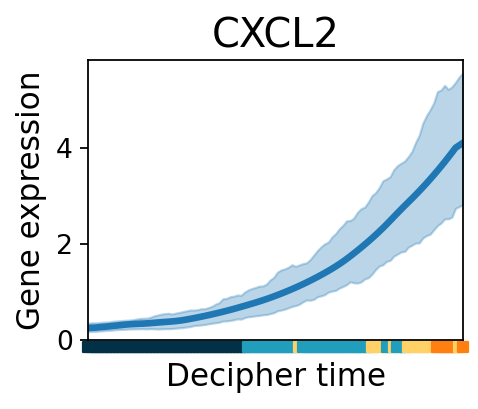

2025-12-24 00:58:08,510 | INFO : maxp pruned
2025-12-24 00:58:08,513 | INFO : cmap pruned
2025-12-24 00:58:08,513 | INFO : kern dropped
2025-12-24 00:58:08,513 | INFO : post pruned
2025-12-24 00:58:08,513 | INFO : FFTM dropped
2025-12-24 00:58:08,514 | INFO : GPOS pruned
2025-12-24 00:58:08,515 | INFO : GSUB pruned
2025-12-24 00:58:08,517 | INFO : glyf pruned
2025-12-24 00:58:08,518 | INFO : Added gid0 to subset
2025-12-24 00:58:08,518 | INFO : Added first four glyphs to subset
2025-12-24 00:58:08,518 | INFO : Closing glyph list over 'GSUB': 25 glyphs before
2025-12-24 00:58:08,518 | INFO : Glyph names: ['.notdef', '.null', 'C', 'D', 'G', 'L', 'X', 'c', 'e', 'eight', 'five', 'h', 'i', 'm', 'n', 'nonmarkingreturn', 'o', 'one', 'p', 'r', 's', 'space', 't', 'x', 'zero']
2025-12-24 00:58:08,518 | INFO : Glyph IDs:   [0, 1, 2, 3, 19, 20, 24, 27, 38, 39, 42, 47, 59, 70, 72, 75, 76, 80, 81, 82, 83, 85, 86, 87, 91]
2025-12-24 00:58:08,520 | INFO : Closed glyph list over 'GSUB': 25 glyphs after

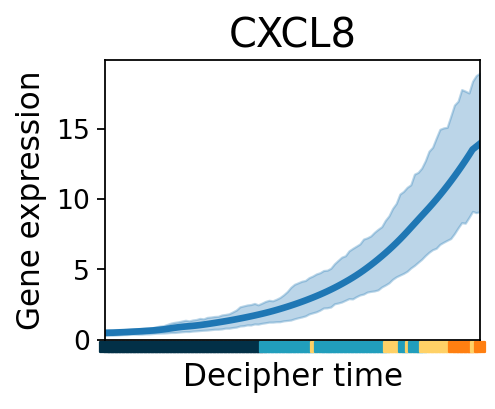

2025-12-24 00:58:08,628 | INFO : maxp pruned
2025-12-24 00:58:08,631 | INFO : cmap pruned
2025-12-24 00:58:08,632 | INFO : kern dropped
2025-12-24 00:58:08,632 | INFO : post pruned
2025-12-24 00:58:08,632 | INFO : FFTM dropped
2025-12-24 00:58:08,633 | INFO : GPOS pruned
2025-12-24 00:58:08,634 | INFO : GSUB pruned
2025-12-24 00:58:08,636 | INFO : glyf pruned
2025-12-24 00:58:08,637 | INFO : Added gid0 to subset
2025-12-24 00:58:08,637 | INFO : Added first four glyphs to subset
2025-12-24 00:58:08,637 | INFO : Closing glyph list over 'GSUB': 27 glyphs before
2025-12-24 00:58:08,637 | INFO : Glyph names: ['.notdef', '.null', 'A', 'B', 'D', 'G', 'H', 'L', 'c', 'e', 'four', 'h', 'hyphen', 'i', 'm', 'n', 'nonmarkingreturn', 'o', 'p', 'r', 's', 'six', 'space', 't', 'two', 'x', 'zero']
2025-12-24 00:58:08,637 | INFO : Glyph IDs:   [0, 1, 2, 3, 16, 19, 21, 23, 25, 36, 37, 39, 42, 43, 47, 70, 72, 75, 76, 80, 81, 82, 83, 85, 86, 87, 91]
2025-12-24 00:58:08,638 | INFO : Closed glyph list over 'G

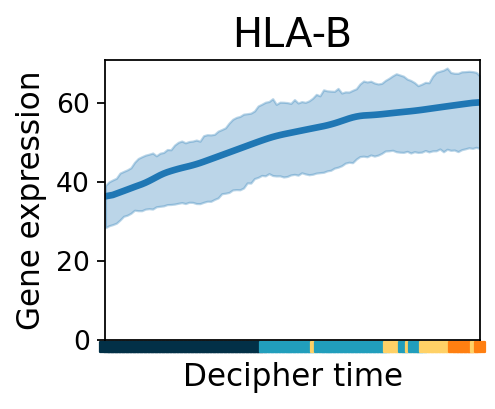

2025-12-24 00:58:08,749 | INFO : maxp pruned
2025-12-24 00:58:08,752 | INFO : cmap pruned
2025-12-24 00:58:08,752 | INFO : kern dropped
2025-12-24 00:58:08,752 | INFO : post pruned
2025-12-24 00:58:08,752 | INFO : FFTM dropped
2025-12-24 00:58:08,753 | INFO : GPOS pruned
2025-12-24 00:58:08,754 | INFO : GSUB pruned
2025-12-24 00:58:08,756 | INFO : glyf pruned
2025-12-24 00:58:08,757 | INFO : Added gid0 to subset
2025-12-24 00:58:08,757 | INFO : Added first four glyphs to subset
2025-12-24 00:58:08,757 | INFO : Closing glyph list over 'GSUB': 28 glyphs before
2025-12-24 00:58:08,757 | INFO : Glyph names: ['.notdef', '.null', 'A', 'C', 'D', 'G', 'I', 'T', 'c', 'e', 'five', 'h', 'i', 'm', 'n', 'nonmarkingreturn', 'o', 'one', 'p', 'period', 'r', 's', 'seven', 'space', 't', 'two', 'x', 'zero']
2025-12-24 00:58:08,757 | INFO : Glyph IDs:   [0, 1, 2, 3, 17, 19, 20, 21, 24, 26, 36, 38, 39, 42, 44, 55, 70, 72, 75, 76, 80, 81, 82, 83, 85, 86, 87, 91]
2025-12-24 00:58:08,759 | INFO : Closed glyph

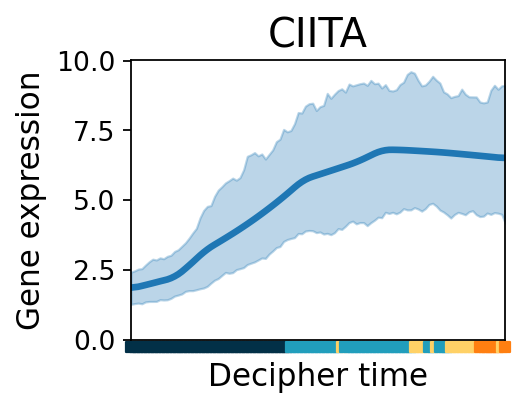

2025-12-24 00:58:08,872 | INFO : maxp pruned
2025-12-24 00:58:08,875 | INFO : cmap pruned
2025-12-24 00:58:08,875 | INFO : kern dropped
2025-12-24 00:58:08,876 | INFO : post pruned
2025-12-24 00:58:08,876 | INFO : FFTM dropped
2025-12-24 00:58:08,876 | INFO : GPOS pruned
2025-12-24 00:58:08,877 | INFO : GSUB pruned
2025-12-24 00:58:08,880 | INFO : glyf pruned
2025-12-24 00:58:08,880 | INFO : Added gid0 to subset
2025-12-24 00:58:08,880 | INFO : Added first four glyphs to subset
2025-12-24 00:58:08,880 | INFO : Closing glyph list over 'GSUB': 23 glyphs before
2025-12-24 00:58:08,880 | INFO : Glyph names: ['.notdef', '.null', 'D', 'G', 'I', 'P', 'c', 'e', 'five', 'h', 'i', 'm', 'n', 'nonmarkingreturn', 'o', 'one', 'p', 'r', 's', 'space', 't', 'x', 'zero']
2025-12-24 00:58:08,881 | INFO : Glyph IDs:   [0, 1, 2, 3, 19, 20, 24, 39, 42, 44, 51, 70, 72, 75, 76, 80, 81, 82, 83, 85, 86, 87, 91]
2025-12-24 00:58:08,882 | INFO : Closed glyph list over 'GSUB': 23 glyphs after
2025-12-24 00:58:08,8

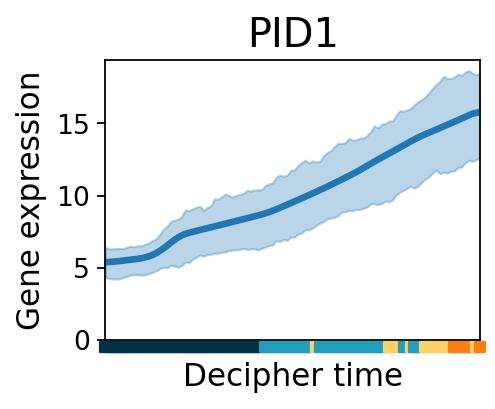

2025-12-24 00:58:08,991 | INFO : maxp pruned
2025-12-24 00:58:08,994 | INFO : cmap pruned
2025-12-24 00:58:08,994 | INFO : kern dropped
2025-12-24 00:58:08,994 | INFO : post pruned
2025-12-24 00:58:08,995 | INFO : FFTM dropped
2025-12-24 00:58:08,996 | INFO : GPOS pruned
2025-12-24 00:58:08,997 | INFO : GSUB pruned
2025-12-24 00:58:09,000 | INFO : glyf pruned
2025-12-24 00:58:09,000 | INFO : Added gid0 to subset
2025-12-24 00:58:09,000 | INFO : Added first four glyphs to subset
2025-12-24 00:58:09,000 | INFO : Closing glyph list over 'GSUB': 25 glyphs before
2025-12-24 00:58:09,000 | INFO : Glyph names: ['.notdef', '.null', 'D', 'G', 'N', 'R', 'c', 'e', 'five', 'h', 'i', 'm', 'n', 'nonmarkingreturn', 'o', 'one', 'p', 'r', 's', 'space', 't', 'three', 'two', 'x', 'zero']
2025-12-24 00:58:09,001 | INFO : Glyph IDs:   [0, 1, 2, 3, 19, 20, 21, 22, 24, 39, 42, 49, 53, 70, 72, 75, 76, 80, 81, 82, 83, 85, 86, 87, 91]
2025-12-24 00:58:09,002 | INFO : Closed glyph list over 'GSUB': 25 glyphs aft

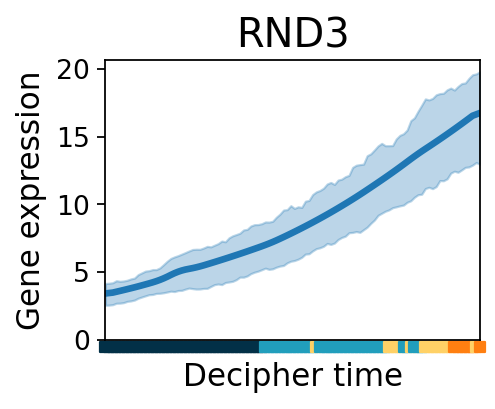

2025-12-24 00:58:09,117 | INFO : maxp pruned
2025-12-24 00:58:09,121 | INFO : cmap pruned
2025-12-24 00:58:09,122 | INFO : kern dropped
2025-12-24 00:58:09,122 | INFO : post pruned
2025-12-24 00:58:09,122 | INFO : FFTM dropped
2025-12-24 00:58:09,123 | INFO : GPOS pruned
2025-12-24 00:58:09,124 | INFO : GSUB pruned
2025-12-24 00:58:09,127 | INFO : glyf pruned
2025-12-24 00:58:09,128 | INFO : Added gid0 to subset
2025-12-24 00:58:09,128 | INFO : Added first four glyphs to subset
2025-12-24 00:58:09,128 | INFO : Closing glyph list over 'GSUB': 23 glyphs before
2025-12-24 00:58:09,128 | INFO : Glyph names: ['.notdef', '.null', 'B', 'D', 'G', 'I', 'c', 'e', 'h', 'i', 'm', 'n', 'nonmarkingreturn', 'o', 'one', 'p', 'r', 's', 'space', 't', 'two', 'x', 'zero']
2025-12-24 00:58:09,129 | INFO : Glyph IDs:   [0, 1, 2, 3, 19, 20, 21, 37, 39, 42, 44, 70, 72, 75, 76, 80, 81, 82, 83, 85, 86, 87, 91]
2025-12-24 00:58:09,130 | INFO : Closed glyph list over 'GSUB': 23 glyphs after
2025-12-24 00:58:09,13

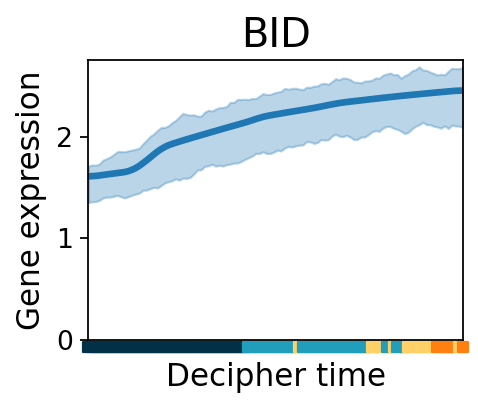

2025-12-24 00:58:09,251 | INFO : maxp pruned
2025-12-24 00:58:09,254 | INFO : cmap pruned
2025-12-24 00:58:09,255 | INFO : kern dropped
2025-12-24 00:58:09,255 | INFO : post pruned
2025-12-24 00:58:09,255 | INFO : FFTM dropped
2025-12-24 00:58:09,256 | INFO : GPOS pruned
2025-12-24 00:58:09,257 | INFO : GSUB pruned
2025-12-24 00:58:09,259 | INFO : glyf pruned
2025-12-24 00:58:09,259 | INFO : Added gid0 to subset
2025-12-24 00:58:09,259 | INFO : Added first four glyphs to subset
2025-12-24 00:58:09,260 | INFO : Closing glyph list over 'GSUB': 27 glyphs before
2025-12-24 00:58:09,260 | INFO : Glyph names: ['.notdef', '.null', 'A', 'D', 'G', 'L', 'M', 'c', 'e', 'five', 'h', 'i', 'm', 'n', 'nonmarkingreturn', 'o', 'one', 'p', 'period', 'r', 's', 'seven', 'space', 't', 'two', 'x', 'zero']
2025-12-24 00:58:09,260 | INFO : Glyph IDs:   [0, 1, 2, 3, 17, 19, 20, 21, 24, 26, 36, 39, 42, 47, 48, 70, 72, 75, 76, 80, 81, 82, 83, 85, 86, 87, 91]
2025-12-24 00:58:09,261 | INFO : Closed glyph list ove

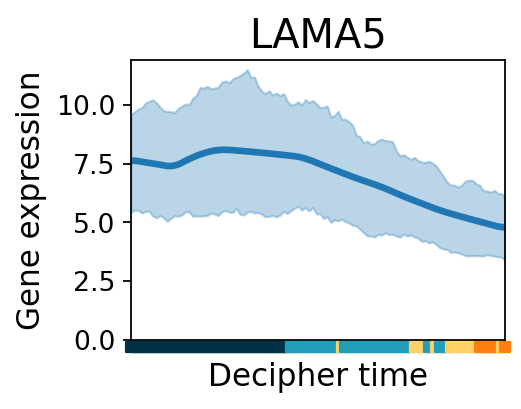

2025-12-24 00:58:09,379 | INFO : maxp pruned
2025-12-24 00:58:09,383 | INFO : cmap pruned
2025-12-24 00:58:09,383 | INFO : kern dropped
2025-12-24 00:58:09,383 | INFO : post pruned
2025-12-24 00:58:09,383 | INFO : FFTM dropped
2025-12-24 00:58:09,384 | INFO : GPOS pruned
2025-12-24 00:58:09,385 | INFO : GSUB pruned
2025-12-24 00:58:09,388 | INFO : glyf pruned
2025-12-24 00:58:09,388 | INFO : Added gid0 to subset
2025-12-24 00:58:09,388 | INFO : Added first four glyphs to subset
2025-12-24 00:58:09,388 | INFO : Closing glyph list over 'GSUB': 26 glyphs before
2025-12-24 00:58:09,388 | INFO : Glyph names: ['.notdef', '.null', 'D', 'G', 'P', 'R', 'V', 'c', 'e', 'five', 'h', 'i', 'm', 'n', 'nonmarkingreturn', 'o', 'one', 'p', 'period', 'r', 's', 'space', 't', 'two', 'x', 'zero']
2025-12-24 00:58:09,389 | INFO : Glyph IDs:   [0, 1, 2, 3, 17, 19, 20, 21, 24, 39, 42, 51, 53, 57, 70, 72, 75, 76, 80, 81, 82, 83, 85, 86, 87, 91]
2025-12-24 00:58:09,390 | INFO : Closed glyph list over 'GSUB': 26 

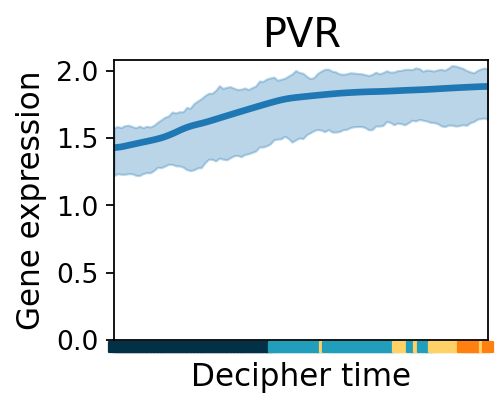

2025-12-24 00:58:09,670 | INFO : maxp pruned
2025-12-24 00:58:09,673 | INFO : cmap pruned
2025-12-24 00:58:09,673 | INFO : kern dropped
2025-12-24 00:58:09,673 | INFO : post pruned
2025-12-24 00:58:09,674 | INFO : FFTM dropped
2025-12-24 00:58:09,674 | INFO : GPOS pruned
2025-12-24 00:58:09,675 | INFO : GSUB pruned
2025-12-24 00:58:09,678 | INFO : glyf pruned
2025-12-24 00:58:09,678 | INFO : Added gid0 to subset
2025-12-24 00:58:09,679 | INFO : Added first four glyphs to subset
2025-12-24 00:58:09,679 | INFO : Closing glyph list over 'GSUB': 24 glyphs before
2025-12-24 00:58:09,679 | INFO : Glyph names: ['.notdef', '.null', 'D', 'F', 'G', 'L', 'T', 'c', 'e', 'five', 'h', 'i', 'm', 'n', 'nonmarkingreturn', 'o', 'one', 'p', 'r', 's', 'space', 't', 'x', 'zero']
2025-12-24 00:58:09,679 | INFO : Glyph IDs:   [0, 1, 2, 3, 19, 20, 24, 39, 41, 42, 47, 55, 70, 72, 75, 76, 80, 81, 82, 83, 85, 86, 87, 91]
2025-12-24 00:58:09,680 | INFO : Closed glyph list over 'GSUB': 24 glyphs after
2025-12-24 0

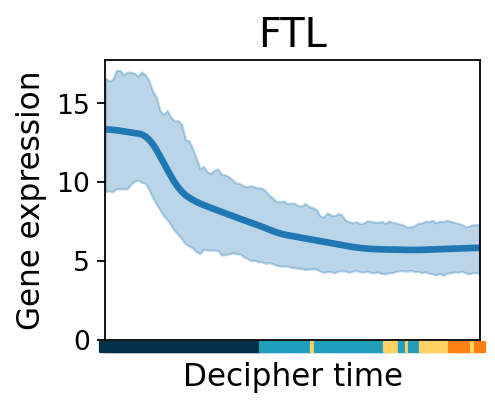

2025-12-24 00:58:09,786 | INFO : maxp pruned
2025-12-24 00:58:09,790 | INFO : cmap pruned
2025-12-24 00:58:09,790 | INFO : kern dropped
2025-12-24 00:58:09,790 | INFO : post pruned
2025-12-24 00:58:09,790 | INFO : FFTM dropped
2025-12-24 00:58:09,791 | INFO : GPOS pruned
2025-12-24 00:58:09,792 | INFO : GSUB pruned
2025-12-24 00:58:09,794 | INFO : glyf pruned
2025-12-24 00:58:09,794 | INFO : Added gid0 to subset
2025-12-24 00:58:09,794 | INFO : Added first four glyphs to subset
2025-12-24 00:58:09,794 | INFO : Closing glyph list over 'GSUB': 28 glyphs before
2025-12-24 00:58:09,794 | INFO : Glyph names: ['.notdef', '.null', 'A', 'C', 'D', 'G', 'L', 'S', 'c', 'e', 'five', 'four', 'h', 'i', 'm', 'n', 'nine', 'nonmarkingreturn', 'o', 'one', 'p', 'r', 's', 'space', 't', 'three', 'x', 'zero']
2025-12-24 00:58:09,795 | INFO : Glyph IDs:   [0, 1, 2, 3, 19, 20, 22, 23, 24, 28, 36, 38, 39, 42, 47, 54, 70, 72, 75, 76, 80, 81, 82, 83, 85, 86, 87, 91]
2025-12-24 00:58:09,796 | INFO : Closed glyph 

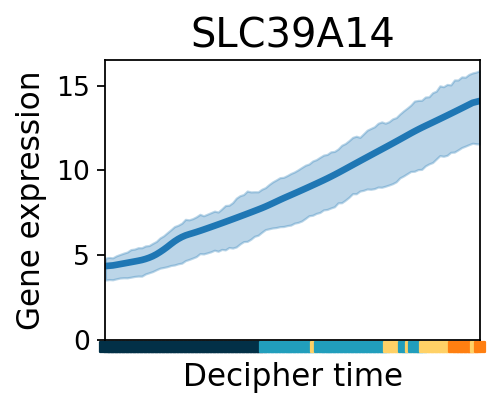

In [8]:
import matplotlib as mpl
mpl.rcParams.update({'font.size': 12, 'svg.fonttype': 'none'})
mpl.rcParams['axes.titlesize'] = 12
mpl.rcParams['xtick.labelsize'] = 12  # Colorbar tick label size
mpl.rcParams['ytick.labelsize'] = 12  # Colorbar tick label size

gene_list = ["SOD2","CSF3","IDO1","CD274",'PDCD1LG2','PEG10','AR','WWTR1','ID1','CXXC5','COL1A2','TAP1','ICAM1','CXCL3','CXCL2','CXCL8', 'HLA-B', 'CIITA','PID1','RND3','BID','LAMA5','PVR','FTL', 'SLC39A14' ]
for i in gene_list:
    dc.pl.gene_patterns(NTC, i, palette=colors, cell_type_key="dosage")
    plt.gca().legend().remove()  # or plt.legend().remove()
    #plt.legend(loc='lower right', bbox_to_anchor=(3, 1))  # Change 'upper right' to your desired location
    #plt.legend(loc='lower right', bbox_to_anchor=(3, 1))  # Adjust location as needed
    # Show the plot
    
    plt.savefig(f'{outdir}'+ i + '_full_expression_plot.pdf',dpi = 300, bbox_inches='tight')
    plt.savefig(f'{outdir}'+ i + '_full_expression_plot.png',dpi = 300, bbox_inches='tight')
    plt.savefig(f'{outdir}'+ i + '_full_expression_plot.svg',dpi = 300, bbox_inches='tight')
    plt.show()

... storing 'P7' as categorical
... storing 'P5' as categorical
... storing 'sample' as categorical
... storing 'RT' as categorical
... storing 'Lig' as categorical
... storing 'oligo' as categorical
... storing 'treatment' as categorical
... storing 'sgRNA' as categorical
... storing 'top_sg' as categorical
... storing 'second_sg' as categorical
... storing 'third_sg' as categorical
... storing 'gene' as categorical
... storing 'second_sg_gene' as categorical
... storing 'third_sg_gene' as categorical
... storing 'RT_lig' as categorical
... storing 'gene_id' as categorical
... storing 'replicate' as categorical


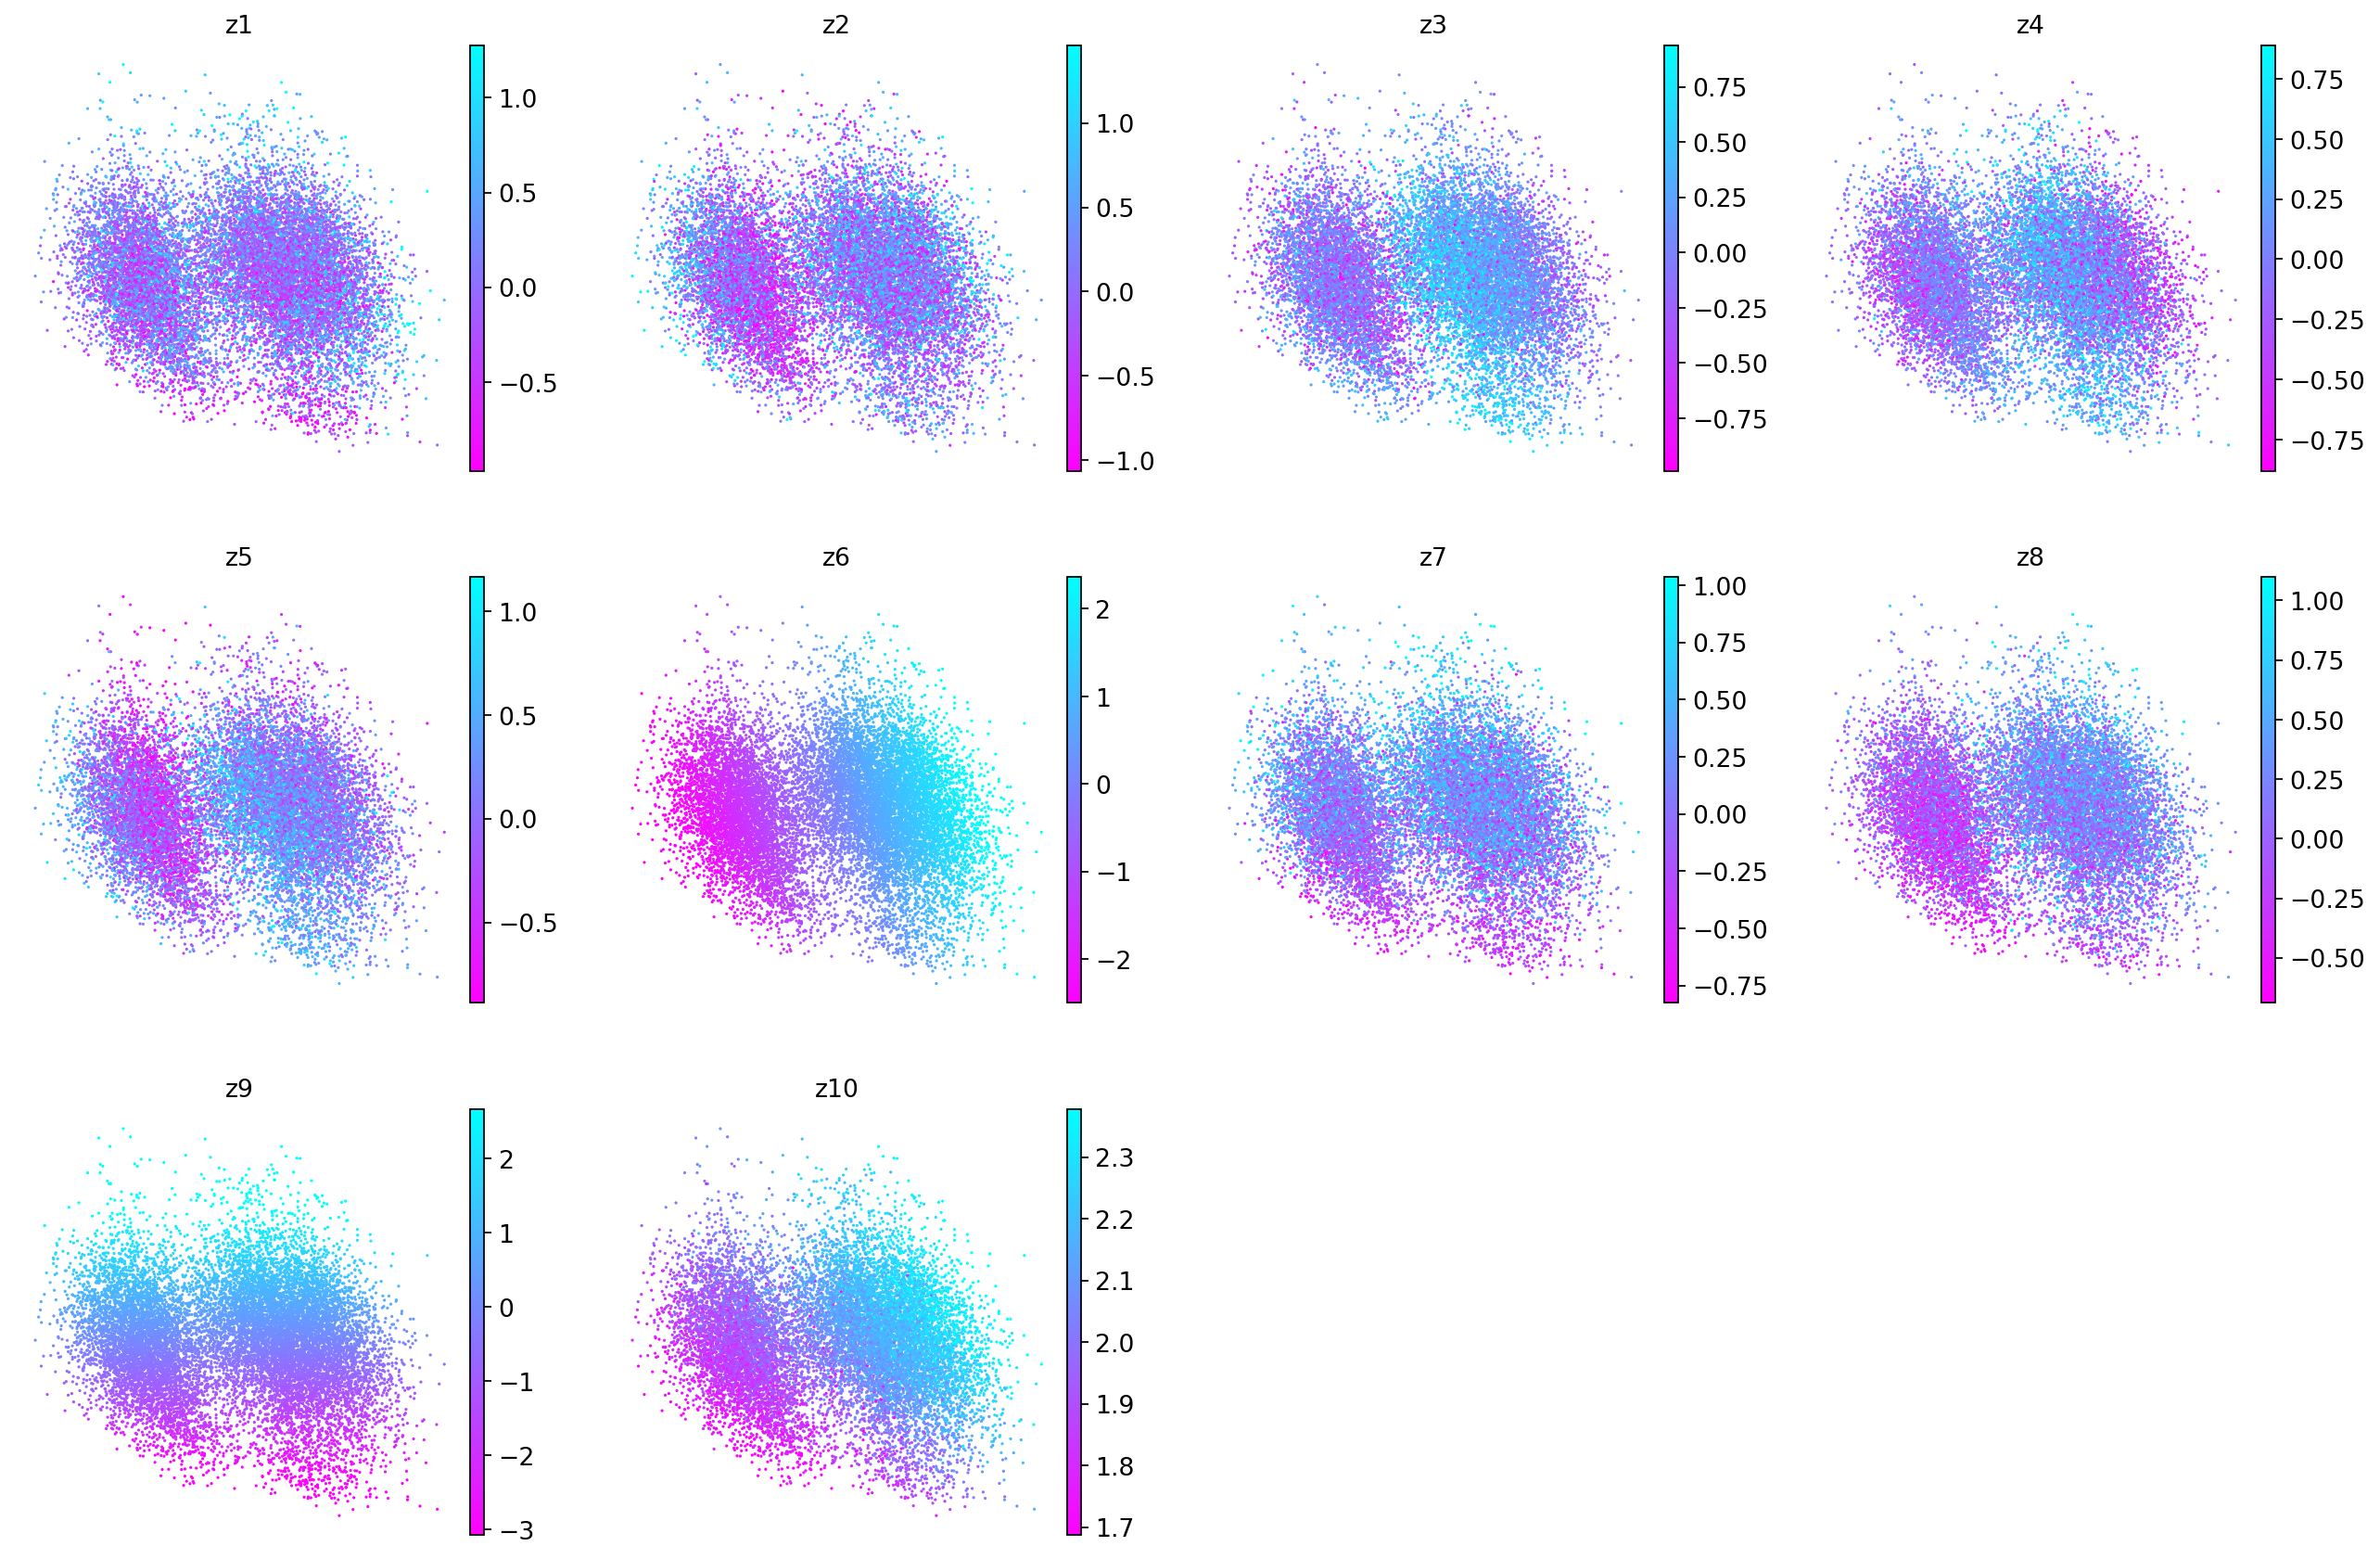

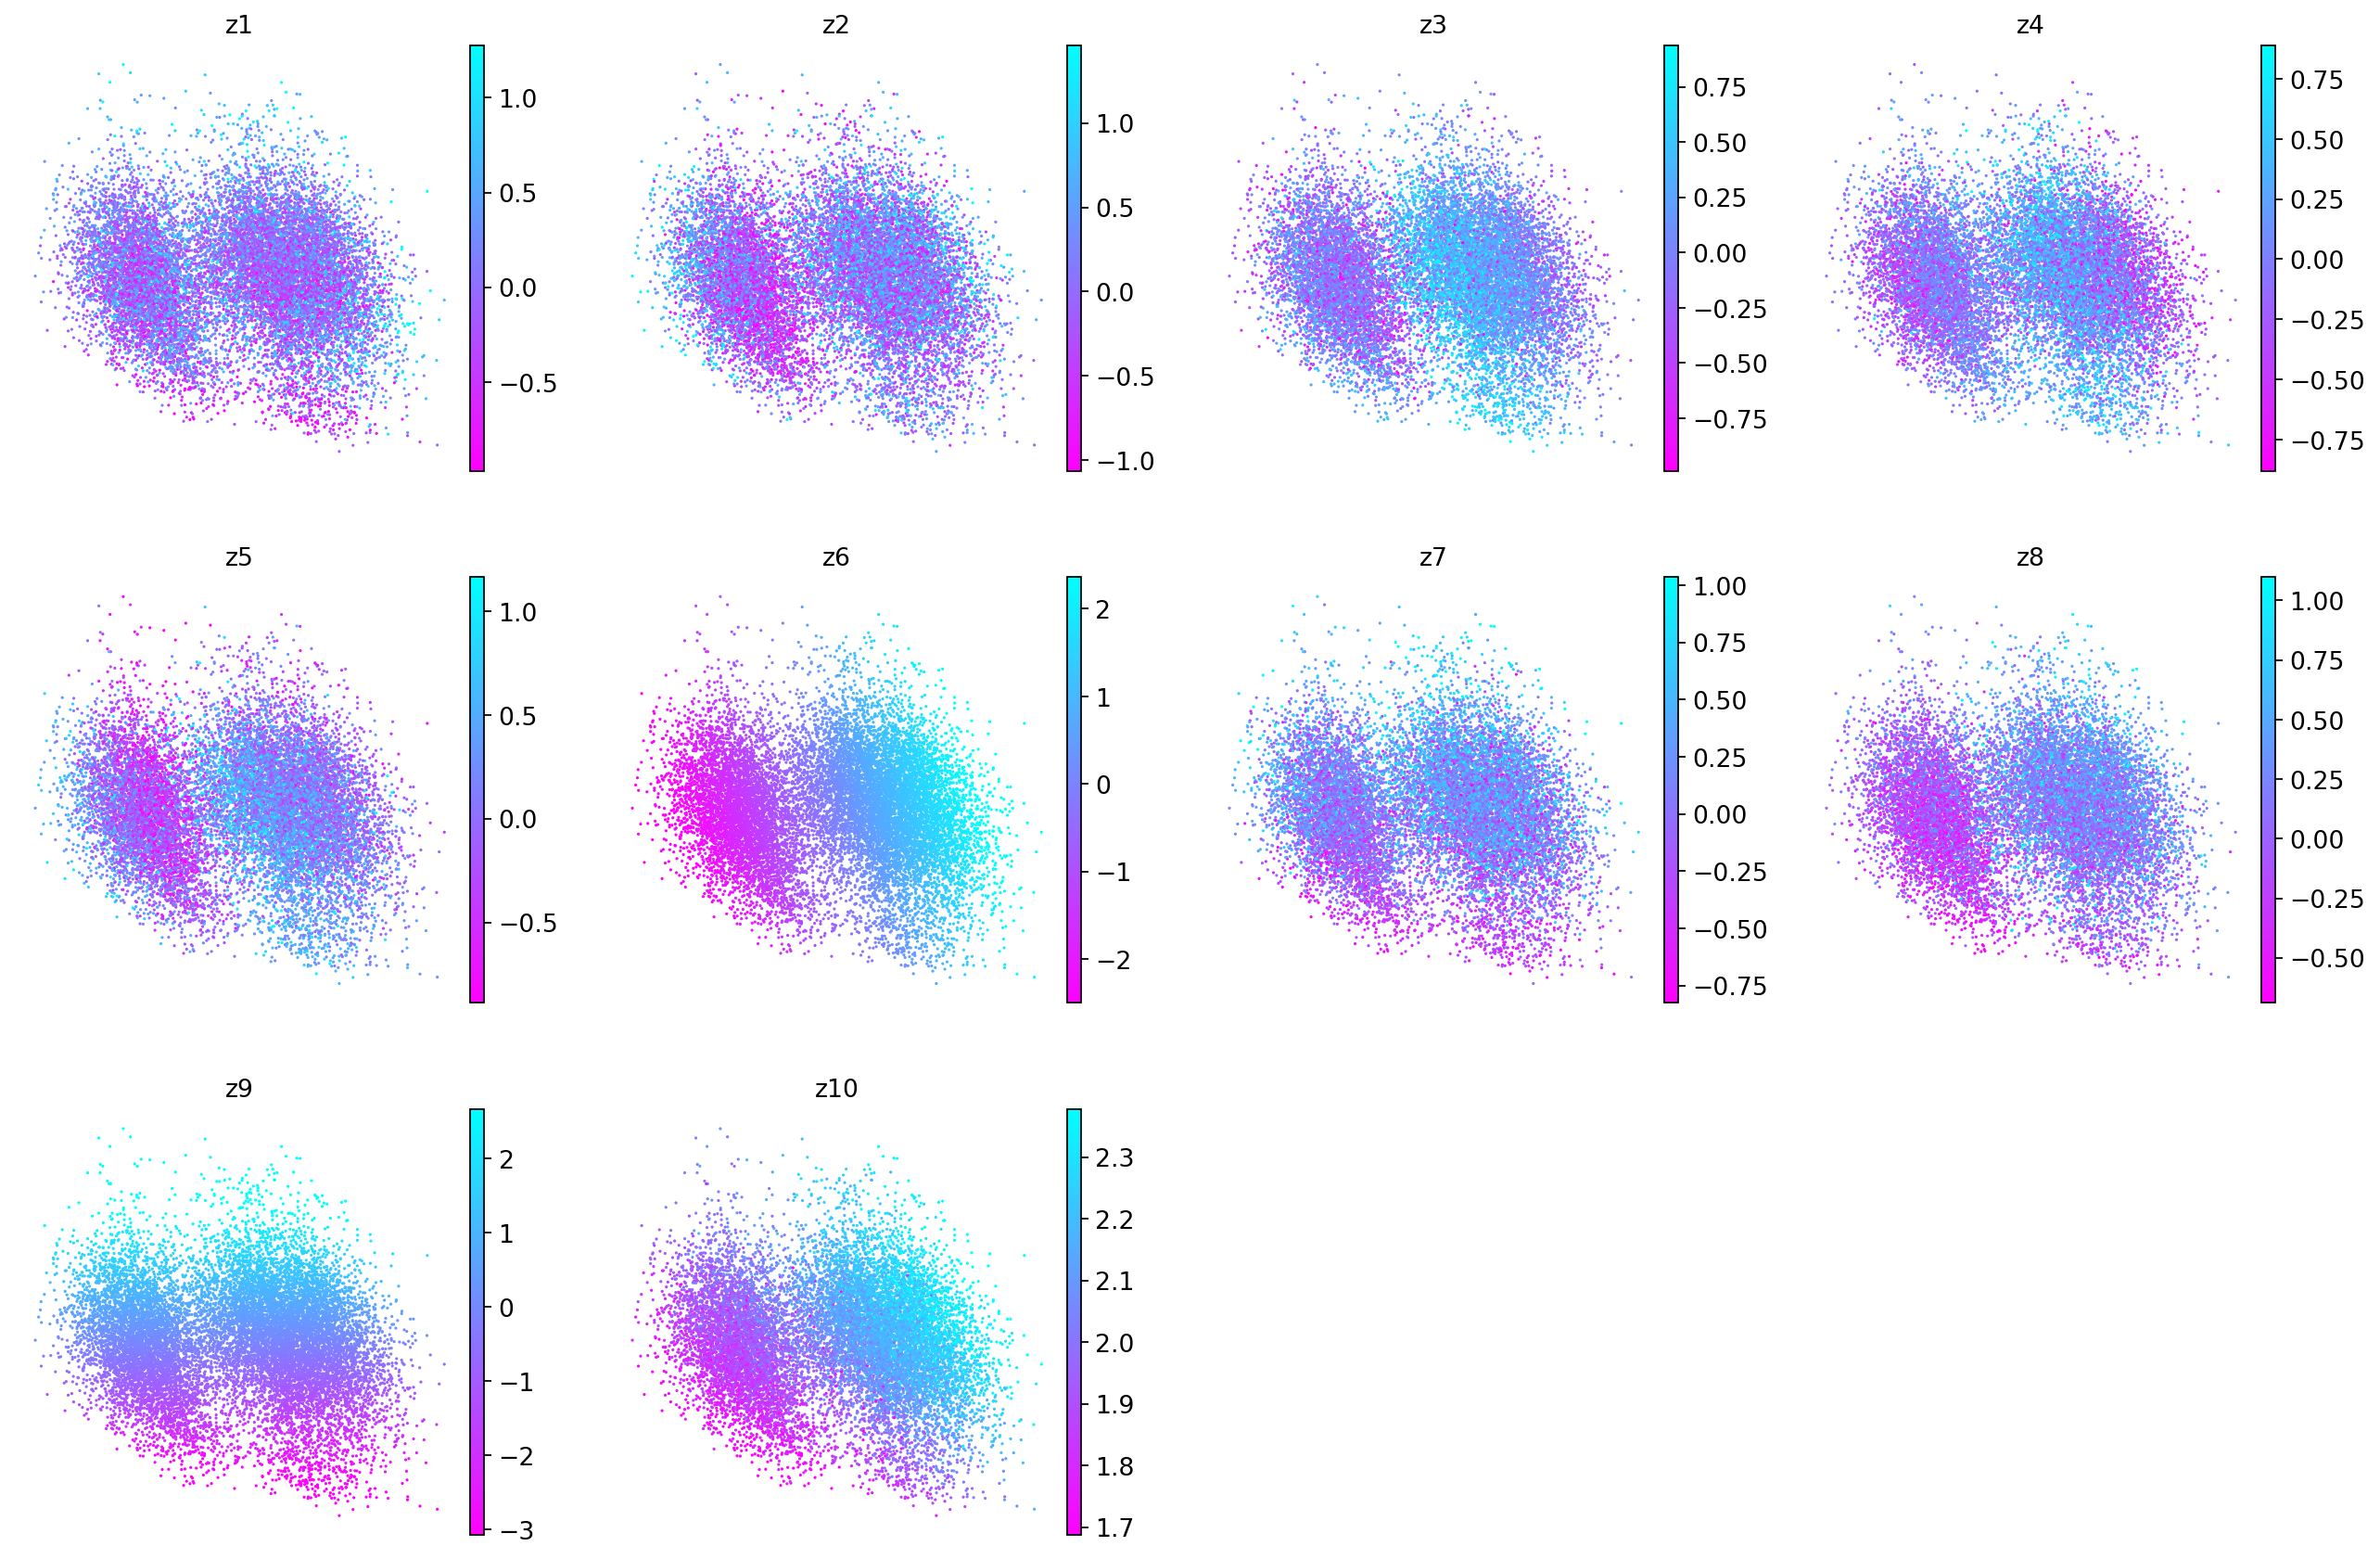

In [34]:
dc.pl.decipher_z(NTC)

In [35]:
NTC.raw.var

_index
0           TSPAN6
1             TNMD
2             DPM1
3            SCYL3
4         C1orf112
...            ...
56643   AL591163.1
56644   AL589702.1
56645  AC068587.10
56646   AL034417.4
56647   AL513220.1

[56648 rows x 1 columns]

In [36]:
NTC.obs

P7   P5              sample   n.umi  log10.umi  \
01A_A01_RT_BC_100_Lig_BC_192  01A  A01  CRISPRA_GBM_Tcells  4231.0   3.626443   
01A_A01_RT_BC_101_Lig_BC_121  01A  A01  CRISPRA_GBM_Tcells  2707.0   3.432488   
01A_A01_RT_BC_101_Lig_BC_164  01A  A01  CRISPRA_GBM_Tcells  2066.0   3.315130   
01A_A01_RT_BC_102_Lig_BC_25   01A  A01  CRISPRA_GBM_Tcells  2303.0   3.362294   
01A_A01_RT_BC_102_Lig_BC_29   01A  A01  CRISPRA_GBM_Tcells  3822.0   3.582291   
...                           ...  ...                 ...     ...        ...   
12A_H12_RT_BC_192_Lig_BC_175  12A  H12  CRISPRA_GBM_Tcells  3780.0   3.577492   
12A_H12_RT_BC_192_Lig_BC_47   12A  H12  CRISPRA_GBM_Tcells  3596.0   3.555820   
12A_H12_RT_BC_98_Lig_BC_100   12A  H12  CRISPRA_GBM_Tcells  8606.0   3.934801   
12A_H12_RT_BC_98_Lig_BC_110   12A  H12  CRISPRA_GBM_Tcells  6893.0   3.838408   
12A_H12_RT_BC_98_Lig_BC_94    12A  H12  CRISPRA_GBM_Tcells  2791.0   3.445760   

                              percent_mito                       cell_ID  \
01A_A01_RT_BC_100_Lig_BC_192           0.0  01A_A01_RT_BC_100_Lig_BC_192   
01A_A01_RT_BC_101_Lig_BC_121           0.0  01A_A01_RT_BC_101_Lig_BC_121   
01A_A01_RT_BC_101_Lig_BC_164           0.0  01A_A01_RT_BC_101_Lig_BC_164   
01A_A01_RT_BC_102_Lig_BC_25            0.0   01A_A01_RT_BC_102_Lig_BC_25   
01A_A01_RT_BC_102_Lig_BC_29            0.0   01A_A01_RT_BC_102_Lig_BC_29   
...                                    ...                           ...   
12A_H12_RT_BC_192_Lig_BC_175           0.0  12A_H12_RT_BC_192_Lig_BC_175   
12A_H12_RT_BC_192_Lig_BC_47            0.0   12A_H12_RT_BC_192_Lig_BC_47   
12A_H12_RT_BC_98_Lig_BC_100            0.0   12A_H12_RT_BC_98_Lig_BC_100   
12A_H12_RT_BC_98_Lig_BC_110            0.0   12A_H12_RT_BC_98_Lig_BC_110   
12A_H12_RT_BC_98_Lig_BC_94             0.0    12A_H12_RT_BC_98_Lig_BC_94   

                                     RT         Lig                  new_cell  \
01A_A01_RT_BC_100_Lig_BC_192  RT_BC_100  Lig_BC_192  A01_RT_BC_100_Lig_BC_192   
01A_A01_RT_BC_101_Lig_BC_121  RT_BC_101  Lig_BC_121  A01_RT_BC_101_Lig_BC_121   
01A_A01_RT_BC_101_Lig_BC_164  RT_BC_101  Lig_BC_164  A01_RT_BC_101_Lig_BC_164   
01A_A01_RT_BC_102_Lig_BC_25   RT_BC_102   Lig_BC_25   A01_RT_BC_102_Lig_BC_25   
01A_A01_RT_BC_102_Lig_BC_29   RT_BC_102   Lig_BC_29   A01_RT_BC_102_Lig_BC_29   
...                                 ...         ...                       ...   
12A_H12_RT_BC_192_Lig_BC_175  RT_BC_192  Lig_BC_175  H12_RT_BC_192_Lig_BC_175   
12A_H12_RT_BC_192_Lig_BC_47   RT_BC_192   Lig_BC_47   H12_RT_BC_192_Lig_BC_47   
12A_H12_RT_BC_98_Lig_BC_100    RT_BC_98  Lig_BC_100   H12_RT_BC_98_Lig_BC_100   
12A_H12_RT_BC_98_Lig_BC_110    RT_BC_98  Lig_BC_110   H12_RT_BC_98_Lig_BC_110   
12A_H12_RT_BC_98_Lig_BC_94     RT_BC_98   Lig_BC_94    H12_RT_BC_98_Lig_BC_94   

                              ...        z1        z2        z3        z4  \
01A_A01_RT_BC_100_Lig_BC_192  ...  0.550634  1.506952 -0.648939 -0.253487   
01A_A01_RT_BC_101_Lig_BC_121  ... -0.577031 -0.038863  0.392402 -0.811554   
01A_A01_RT_BC_101_Lig_BC_164  ... -0.367342 -0.081394  0.245698 -0.056811   
01A_A01_RT_BC_102_Lig_BC_25   ...  0.276531  0.073533  0.635508  0.606130   
01A_A01_RT_BC_102_Lig_BC_29   ...  0.008380 -0.534427  0.611975  0.003701   
...                           ...       ...       ...       ...       ...   
12A_H12_RT_BC_192_Lig_BC_175  ...  0.694322  1.060218  0.671642 -0.065093   
12A_H12_RT_BC_192_Lig_BC_47   ...  1.195161  0.958834 -0.958714  0.324458   
12A_H12_RT_BC_98_Lig_BC_100   ... -0.139437 -0.285924  0.484725 -0.019465   
12A_H12_RT_BC_98_Lig_BC_110   ...  0.211982  0.497657  0.158132  0.020644   
12A_H12_RT_BC_98_Lig_BC_94    ... -0.259651  0.651666  0.200555 -0.046879   

                                    z5        z6        z7        z8  \
01A_A01_RT_BC_100_Lig_BC_192  0.303042  2.668710 -0.371339  0.485404   
01A_A01_RT_BC_101_Lig_BC_121  0.105416  1.849698  0.197902  0.166256   
01A_A01_RT_BC_101_Lig_BC_164  0

In [37]:
#NTC.var.rename(columns={'_index':'index'},inplace=True)
NTC.raw.var.rename(columns={'_index':'index'},inplace=True) 
NTC.write(f'{outdir}NTC_TCDG.h5ad')

# Run gene modules in R with Scorpious

In [5]:
NTC = anndata.read_h5ad(f'{outdir}NTC_TCDG.h5ad')

In [6]:
NTC

AnnData object with n_obs × n_vars = 14378 × 4023
    obs: 'P7', 'P5', 'sample', 'n.umi', 'log10.umi', 'percent_mito', 'cell_ID', 'RT', 'Lig', 'new_cell', 'oligo', 'total_reads.x', 'total_hash_umis_per_cell_ID', 'top_to_second_best_ratio', 'treatment', 'sgRNA', 'total_reads.y', 'sgRNA_proportion', 'total_sgrna_read_per_cell', 'rank', 'top_to_second', 'second_to_third', 'third_to_next', 'top_proportion', 'second_proportion', 'third_proportion', 'top_sg', 'second_sg', 'third_sg', 'gene', 'second_sg_gene', 'third_sg_gene', 'cell', 'RT_lig', 'num_genes_expressed', 'Size_Factor', 'gene_id', 'replicate', 'g1s_score', 'g2m_score', 'proliferation_index', 'dose', 'UMAP1', 'UMAP2', 'PCA_Cluster', 'dosage', 'decipher_split', 'decipher_clusters', 'decipher_time', 'z1', 'z2', 'z3', 'z4', 'z5', 'z6', 'z7', 'z8', 'z9', 'z10'
    var: 'features'
    uns: 'decipher'
    obsm: 'decipher_v', 'decipher_v_not_rotated', 'decipher_z', 'decipher_z_not_rotated'

In [40]:
NTC.obs['decipher_time']

01A_A01_RT_BC_100_Lig_BC_192    1.768311
01A_A01_RT_BC_101_Lig_BC_121    1.990613
01A_A01_RT_BC_101_Lig_BC_164    1.566219
01A_A01_RT_BC_102_Lig_BC_25     1.343917
01A_A01_RT_BC_102_Lig_BC_29     1.485382
                                  ...   
12A_H12_RT_BC_192_Lig_BC_175    1.990613
12A_H12_RT_BC_192_Lig_BC_47     1.626846
12A_H12_RT_BC_98_Lig_BC_100     1.525800
12A_H12_RT_BC_98_Lig_BC_110     1.505591
12A_H12_RT_BC_98_Lig_BC_94      0.090942
Name: decipher_time, Length: 14378, dtype: float64

In [41]:
# First install pyreadr if you haven't already
#!pip install pyreadr

import pyreadr

# Read the RDS file
modules = pyreadr.read_r(f'{outdir}/trajectory_modules.rds')

# Since RDS files can contain multiple objects, the result is a dictionary
# If there's only one object (most common case):
modules = modules[None]  # or result[0]

In [42]:
modules.to_csv(f'{outdir}/trajectory_modules.csv')

In [43]:
modules['feature']

0            DLX3
1          SAMD11
2          PLXDC2
3          SEMA5A
4      AC008667.1
          ...    
134      SERPINB2
135          CSF3
136         CXCL8
137         CXCL2
138         CXCL3
Name: feature, Length: 139, dtype: object

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.ndimage import gaussian_filter1d
from sklearn.preprocessing import StandardScaler

def plot_pseudotime_heatmap(adata, genes, time_key, category_keys=None, 
                           category_colors=None, n_bins=100, smooth=True, 
                           smooth_sigma=2.0, scale=True, cluster_genes=False, 
                           figsize=None, cmap='viridis', bar_height=0.05,
                           square_cells=True, genes_of_interest=None):
    """
    Plot a heatmap of gene expression along pseudotime with multiple category bars.
    
    Parameters
    ----------
    adata : AnnData
        Annotated data object
    genes : list
        List of gene names to plot
    time_key : str
        Key in adata.obs containing pseudotime values
    category_keys : str or list, optional
        Key(s) in adata.obs for categorical annotation bars above heatmap.
        Can be a single string or list of strings for multiple bars.
    category_colors : dict or list of dict, optional
        Color mapping for categories. If category_keys is a list, this should be
        a list of dicts with format {category_value: color}. If single category_key,
        can be a single dict. If None, uses default colors.
    n_bins : int, default 100
        Number of pseudotime bins
    smooth : bool, default True
        Whether to smooth expression values
    smooth_sigma : float, default 2.0
        Smoothing strength (higher = more smooth). Use 1.0 for light smoothing,
        2.0-3.0 for moderate smoothing, 4.0+ for heavy smoothing
    scale : bool, default True
        Whether to scale expression values (0-1)
    cluster_genes : bool, default False
        Whether to cluster genes (if False, preserves input gene order)
    figsize : tuple, optional
        Figure size. If None, automatically calculated for square cells
    square_cells : bool, default True
        Whether to make heatmap cells approximately square
    cmap : str, default 'viridis'
        Colormap to use for heatmap
    show_pseudotime_bar : bool, default False
        Whether to show a pseudotime gradient bar above the heatmap
    pseudotime_cmap : str, default 'plasma'
        Colormap to use for pseudotime bar
        
    Returns
    -------
    fig : matplotlib.figure.Figure
        The figure object
    """
    
    # Validate genes
    valid_genes = [g for g in genes if g in adata.var_names]
    if not valid_genes:
        raise ValueError("No valid genes found in adata")
    if len(valid_genes) < len(genes):
        missing = set(genes) - set(valid_genes)
        print(f"Warning: Missing genes: {missing}")
    
    # Validate pseudotime
    if time_key not in adata.obs.columns:
        raise ValueError(f"Pseudotime key '{time_key}' not found in adata.obs")
    
    # Handle category keys
    if category_keys is not None:
        if isinstance(category_keys, str):
            category_keys = [category_keys]
        
        # Validate category keys
        invalid_keys = [k for k in category_keys if k not in adata.obs.columns]
        if invalid_keys:
            raise ValueError(f"Category keys not found in adata.obs: {invalid_keys}")
    
    # Handle category colors
    if category_colors is not None:
        if isinstance(category_keys, list) and len(category_keys) > 1:
            if not isinstance(category_colors, list):
                category_colors = [category_colors]
            if len(category_colors) != len(category_keys):
                raise ValueError("Number of category_colors must match number of category_keys")
        elif isinstance(category_colors, list) and len(category_keys) == 1:
            category_colors = category_colors[0]
    
    # Extract data
    pseudotime = adata.obs[time_key].values
    gene_expr = adata[:, valid_genes].X
    
    # Convert sparse to dense if needed
    if hasattr(gene_expr, 'toarray'):
        gene_expr = gene_expr.toarray()
    
    # Remove cells with missing pseudotime
    valid_mask = ~np.isnan(pseudotime)
    pseudotime = pseudotime[valid_mask]
    gene_expr = gene_expr[valid_mask, :]
    valid_adata = adata[valid_mask]
    
    # Create pseudotime bins
    time_bins = np.linspace(pseudotime.min(), pseudotime.max(), n_bins)
    bin_centers = (time_bins[:-1] + time_bins[1:]) / 2
    
    # Bin the expression data
    binned_expr = np.zeros((len(valid_genes), len(bin_centers)))
    bin_categories = {key: [] for key in (category_keys or [])}
    
    for i, time_point in enumerate(bin_centers):
        # Find cells in this bin
        bin_start = time_bins[i]
        bin_end = time_bins[i + 1]
        mask = (pseudotime >= bin_start) & (pseudotime < bin_end)
        
        if np.sum(mask) > 0:
            # Average expression in this bin
            binned_expr[:, i] = np.mean(gene_expr[mask, :], axis=0)
            
            # Get categories for this bin
            if category_keys:
                for key in category_keys:
                    bin_cats = valid_adata.obs.loc[mask, key]
                    # Use most common category in bin
                    most_common = bin_cats.mode().iloc[0] if len(bin_cats) > 0 else 'Unknown'
                    bin_categories[key].append(most_common)
        else:
            # Use nearest neighbor if no cells in bin
            nearest_idx = np.argmin(np.abs(pseudotime - time_point))
            binned_expr[:, i] = gene_expr[nearest_idx, :]
            if category_keys:
                for key in category_keys:
                    bin_categories[key].append(valid_adata.obs.iloc[nearest_idx][key])
    
    # Smooth expression if requested
    if smooth:
        binned_expr = gaussian_filter1d(binned_expr, sigma=smooth_sigma, axis=1)
    
    # Scale expression if requested
    if scale:
        binned_expr = np.array([
            (row - row.min()) / (row.max() - row.min()) if row.max() > row.min() else row
            for row in binned_expr
        ])
    
    # Create DataFrame - preserve gene order from input
    df = pd.DataFrame(binned_expr, index=valid_genes, columns=bin_centers)
    
    # Reorder to match input gene order (in case some genes were missing)
    ordered_genes = [g for g in genes if g in valid_genes]
    df = df.loc[ordered_genes]
    
    # Debug print to check gene order
    print(f"Ordered genes (first 10): {ordered_genes[:10]}")
    print(f"DataFrame index (first 10): {list(df.index)[:10]}")
    if genes_of_interest:
        print(f"Genes of interest: {genes_of_interest}")
        for gene in genes_of_interest:
            if gene in ordered_genes:
                print(f"{gene} is at position {ordered_genes.index(gene)} in ordered_genes")
    
    # Calculate figure size for square cells if not provided
    if figsize is None and square_cells:
        # Base calculations for square aspect
        n_genes = len(ordered_genes)
        n_time_points = len(bin_centers)
        
        # Calculate dimensions to make cells roughly square
        cell_size = 0.02  # Size per cell in inches
        width = max(8, n_time_points * cell_size)
        height = max(4, n_genes * cell_size)
        
        # Add space for category bars
        n_total_bars = len(category_keys) if category_keys else 0
        if n_total_bars > 0:
            height += n_total_bars * 0.2  # Reduced space for thinner bars
        
        figsize = (width, height)
    elif figsize is None:
        figsize = (12, 8)  # Default fallback
    
    # Create color mappings for categories
    col_colors_list = []
    legends_info = []
    
    if category_keys:
        for i, key in enumerate(category_keys):
            unique_cats = list(set(bin_categories[key]))
            
            # Use provided colors or generate default colors
            if category_colors and isinstance(category_colors, list):
                color_map = category_colors[i] if i < len(category_colors) else {}
            elif category_colors and not isinstance(category_colors, list):
                color_map = category_colors
            else:
                color_map = {}
            
            # Generate colors for missing categories
            default_colors = plt.cm.Set3(np.linspace(0, 1, len(unique_cats)))
            for j, cat in enumerate(unique_cats):
                if cat not in color_map:
                    color_map[cat] = default_colors[j]
            
            # Create color array for this category
            cat_colors = [color_map[cat] for cat in bin_categories[key]]
            col_colors_list.append(cat_colors)
            legends_info.append((key, color_map))
    
    # Determine subplot structure
    n_cat_bars = len(category_keys) if category_keys else 0
    
    if n_cat_bars > 0:
        height_ratios = [bar_height] * n_cat_bars + [1.0]
        fig, axes = plt.subplots(n_cat_bars + 1, 1, figsize=figsize, 
                                gridspec_kw={'height_ratios': height_ratios,
                                           'hspace': 0.0})  # No space between plots
        if n_cat_bars == 1:
            axes = [axes[0], axes[1]]  # Ensure it's always a list
        
        # Plot category bars
        for i, (cat_key, cat_colors) in enumerate(zip(category_keys, col_colors_list)):
            ax_cat = axes[i]
            
            # Convert colors to RGB values for imshow
            from matplotlib.colors import to_rgba
            cat_colors_rgba = [to_rgba(color) for color in cat_colors]
            cat_array = np.array(cat_colors_rgba).reshape(1, -1, 4)  # RGBA format
            
            # Use same extent as heatmap for perfect alignment
            ax_cat.imshow(cat_array, aspect='auto', extent=[0, len(bin_centers), 0, 1])
            ax_cat.set_xlim(0, len(bin_centers))
            ax_cat.set_xticks([])
            ax_cat.set_yticks([])
            ax_cat.set_ylabel(cat_key, rotation=0, ha='right', va='center', fontsize=10)
            
            # Remove spines
            for spine in ax_cat.spines.values():
                spine.set_visible(False)
        
        # Plot heatmap
        ax_heat = axes[-1]
        
        if cluster_genes and len(valid_genes) > 1:
            # For clustering, we need to use clustermap which creates its own figure
            # So we'll create the clustermap separately and copy it
            g = sns.clustermap(
                df, 
                cmap=cmap, 
                figsize=(figsize[0], figsize[1] * 0.7),  # Adjust height for category bars
                row_cluster=True,
                col_cluster=False,
                xticklabels=False,
                cbar_pos=(0.92, 0.2, 0.02, 0.6)  # Thinner colorbar: (x, y, width, height)
            )
            
            # We'll use the clustered order but plot on our main figure
            clustered_df = df.iloc[g.dendrogram_row.reordered_ind]
            im = ax_heat.imshow(clustered_df.values, cmap=cmap, aspect='auto')
            ax_heat.set_yticks(range(len(clustered_df.index)))
            ax_heat.set_yticklabels(clustered_df.index)
            
            # Add colorbar aligned with heatmap for clustered version - positioned close
            cbar_ax = fig.add_axes([0.91, ax_heat.get_position().y0, 0.015, ax_heat.get_position().height])  # Closer and thinner
            plt.colorbar(im, cax=cbar_ax)
            
            plt.close(g.fig)  # Close the clustermap figure
        else:
            im = ax_heat.imshow(df.values, cmap=cmap, aspect='auto', extent=[0, len(bin_centers), 0, len(ordered_genes)])
            
            # Set gene labels based on genes_of_interest  
            if genes_of_interest is not None:
                if len(genes_of_interest) == 0:
                    # No labels
                    ax_heat.set_yticks([])
                    ax_heat.set_yticklabels([])
                else:
                    # Only show labels for genes of interest
                    gene_positions = []
                    gene_labels = []
                    for gene in genes_of_interest:
                        if gene in df.index:
                            # Get position in DataFrame (which should match visual order)
                            pos = list(df.index).index(gene)
                            # Since imshow shows first row at top, position 0 is at top
                            # Y-axis goes from 0 (bottom) to len(genes) (top)
                            # So we need to flip: visual_pos = len(genes) - 1 - dataframe_pos
                            visual_pos = len(df.index) - 1 - pos
                            gene_positions.append(visual_pos + 0.5)
                            gene_labels.append(gene)
                    ax_heat.set_yticks(gene_positions)
                    ax_heat.set_yticklabels(gene_labels)
            else:
                # Show all gene labels (flipped for imshow)
                positions = np.arange(len(df.index)) + 0.5
                labels = list(df.index)[::-1]  # Reverse for imshow
                ax_heat.set_yticks(positions)
                ax_heat.set_yticklabels(labels)
            
            # FIXED: Add colorbar aligned with heatmap axes - positioned close to heatmap
            # Get the exact position of the heatmap axes
            pos = ax_heat.get_position()
            # Create colorbar axes with same height and y-position as heatmap, positioned close
            cbar_ax = fig.add_axes([pos.x1 + 0.01, pos.y0, 0.015, pos.height])  # Closer and thinner
            cbar = plt.colorbar(im, cax=cbar_ax)
            cbar.set_label('Scaled Expression' if scale else 'Expression', rotation=270, labelpad=15)
        
        # Customize heatmap
        ax_heat.set_xlabel(f'{time_key}')
        ax_heat.set_ylabel('Genes')
        
        # Set x-axis ticks to align with heatmap
        n_ticks = 8
        tick_positions = np.linspace(0, len(bin_centers), n_ticks)
        ax_heat.set_xticks(tick_positions)
        tick_labels = []
        for i in range(n_ticks):
            if i == n_ticks - 1:
                tick_labels.append(f'{bin_centers[-1]:.2f}')
            else:
                idx = int(i * (len(bin_centers) - 1) / (n_ticks - 1))
                tick_labels.append(f'{bin_centers[idx]:.2f}')
        ax_heat.set_xticklabels(tick_labels)
        
        # Plot the heatmap and colorbar first, then add legends
        # This ensures proper rendering order
        fig.canvas.draw_idle()  # Force drawing of heatmap and colorbar
        
        # Add legends for categories - positioned further out after colorbar
        legend_x_start = pos.x1 + 0.06  # Further out to account for closer colorbar
        for i, (cat_key, color_map) in enumerate(legends_info):
            from matplotlib.patches import Patch
            legend_elements = [Patch(facecolor=color, label=cat) 
                             for cat, color in color_map.items()]
            ax_heat.legend(handles=legend_elements, 
                          title=cat_key,
                          bbox_to_anchor=(legend_x_start + i*0.15, 1), 
                          loc='upper left', frameon=False)
    
    else:
        # No category bars, simple heatmap
        fig, ax_heat = plt.subplots(figsize=figsize)
        
        if cluster_genes and len(valid_genes) > 1:
            g = sns.clustermap(
                df, 
                cmap=cmap, 
                figsize=figsize,
                row_cluster=True,
                col_cluster=False,
                xticklabels=False
            )
            return g.fig
        else:
            sns.heatmap(df, cmap=cmap, ax=ax_heat, xticklabels=False, cbar=True)
        
        ax_heat.set_xlabel(f'{time_key}')
        ax_heat.set_ylabel('Genes')
        
        # Set x-axis ticks
        n_ticks = 8
        tick_positions = np.linspace(0, len(bin_centers), n_ticks)
        ax_heat.set_xticks(tick_positions)
        tick_labels = []
        for i in range(n_ticks):
            if i == n_ticks - 1:
                tick_labels.append(f'{bin_centers[-1]:.2f}')
            else:
                idx = int(i * (len(bin_centers) - 1) / (n_ticks - 1))
                tick_labels.append(f'{bin_centers[idx]:.2f}')
        ax_heat.set_xticklabels(tick_labels)
        
        # Add category legend(s) - draw after heatmap for proper layering
        if category_keys and legends_info:
            # Force drawing of heatmap first
            fig.canvas.draw_idle()
            
            legend_x_start = 1.25  # Start legends after the colorbar
            for i, (cat_key, color_map) in enumerate(legends_info):
                from matplotlib.patches import Patch
                legend_elements = [Patch(facecolor=color, label=cat) 
                                 for cat, color in color_map.items()]
                ax_heat.legend(handles=legend_elements, 
                              title=cat_key,
                              bbox_to_anchor=(legend_x_start + i*0.15, 1), 
                              loc='upper left',
                              frameon=True,
                              fancybox=True,
                              shadow=True)
    
    plt.tight_layout()
    return fig

# Example usage:
"""
# Only show specific genes of interest
genes_to_label = ['SMAD9', 'DCC', 'TNFRSF12A']
fig = plot_pseudotime_heatmap(adata, genes, 'dpt_pseudotime',
                             category_keys=['cell_type'],
                             category_colors=[cell_colors],
                             genes_of_interest=genes_to_label,
                             bar_height=0.05)  # Very thin bars

# No gene labels (clean look)
fig = plot_pseudotime_heatmap(adata, genes, 'dpt_pseudotime',
                             genes_of_interest=[])  # Empty list = no labels

plt.show()
"""

"\n# Only show specific genes of interest\ngenes_to_label = ['SMAD9', 'DCC', 'TNFRSF12A']\nfig = plot_pseudotime_heatmap(adata, genes, 'dpt_pseudotime',\n                             category_keys=['cell_type'],\n                             category_colors=[cell_colors],\n                             genes_of_interest=genes_to_label,\n                             bar_height=0.05)  # Very thin bars\n\n# No gene labels (clean look)\nfig = plot_pseudotime_heatmap(adata, genes, 'dpt_pseudotime',\n                             genes_of_interest=[])  # Empty list = no labels\n\nplt.show()\n"

In [45]:
NTC.obs

P7   P5              sample   n.umi  log10.umi  \
01A_A01_RT_BC_100_Lig_BC_192  01A  A01  CRISPRA_GBM_Tcells  4231.0   3.626443   
01A_A01_RT_BC_101_Lig_BC_121  01A  A01  CRISPRA_GBM_Tcells  2707.0   3.432488   
01A_A01_RT_BC_101_Lig_BC_164  01A  A01  CRISPRA_GBM_Tcells  2066.0   3.315130   
01A_A01_RT_BC_102_Lig_BC_25   01A  A01  CRISPRA_GBM_Tcells  2303.0   3.362294   
01A_A01_RT_BC_102_Lig_BC_29   01A  A01  CRISPRA_GBM_Tcells  3822.0   3.582291   
...                           ...  ...                 ...     ...        ...   
12A_H12_RT_BC_192_Lig_BC_175  12A  H12  CRISPRA_GBM_Tcells  3780.0   3.577492   
12A_H12_RT_BC_192_Lig_BC_47   12A  H12  CRISPRA_GBM_Tcells  3596.0   3.555820   
12A_H12_RT_BC_98_Lig_BC_100   12A  H12  CRISPRA_GBM_Tcells  8606.0   3.934801   
12A_H12_RT_BC_98_Lig_BC_110   12A  H12  CRISPRA_GBM_Tcells  6893.0   3.838408   
12A_H12_RT_BC_98_Lig_BC_94    12A  H12  CRISPRA_GBM_Tcells  2791.0   3.445760   

                              percent_mito                       cell_ID  \
01A_A01_RT_BC_100_Lig_BC_192           0.0  01A_A01_RT_BC_100_Lig_BC_192   
01A_A01_RT_BC_101_Lig_BC_121           0.0  01A_A01_RT_BC_101_Lig_BC_121   
01A_A01_RT_BC_101_Lig_BC_164           0.0  01A_A01_RT_BC_101_Lig_BC_164   
01A_A01_RT_BC_102_Lig_BC_25            0.0   01A_A01_RT_BC_102_Lig_BC_25   
01A_A01_RT_BC_102_Lig_BC_29            0.0   01A_A01_RT_BC_102_Lig_BC_29   
...                                    ...                           ...   
12A_H12_RT_BC_192_Lig_BC_175           0.0  12A_H12_RT_BC_192_Lig_BC_175   
12A_H12_RT_BC_192_Lig_BC_47            0.0   12A_H12_RT_BC_192_Lig_BC_47   
12A_H12_RT_BC_98_Lig_BC_100            0.0   12A_H12_RT_BC_98_Lig_BC_100   
12A_H12_RT_BC_98_Lig_BC_110            0.0   12A_H12_RT_BC_98_Lig_BC_110   
12A_H12_RT_BC_98_Lig_BC_94             0.0    12A_H12_RT_BC_98_Lig_BC_94   

                                     RT         Lig                  new_cell  \
01A_A01_RT_BC_100_Lig_BC_192  RT_BC_100  Lig_BC_192  A01_RT_BC_100_Lig_BC_192   
01A_A01_RT_BC_101_Lig_BC_121  RT_BC_101  Lig_BC_121  A01_RT_BC_101_Lig_BC_121   
01A_A01_RT_BC_101_Lig_BC_164  RT_BC_101  Lig_BC_164  A01_RT_BC_101_Lig_BC_164   
01A_A01_RT_BC_102_Lig_BC_25   RT_BC_102   Lig_BC_25   A01_RT_BC_102_Lig_BC_25   
01A_A01_RT_BC_102_Lig_BC_29   RT_BC_102   Lig_BC_29   A01_RT_BC_102_Lig_BC_29   
...                                 ...         ...                       ...   
12A_H12_RT_BC_192_Lig_BC_175  RT_BC_192  Lig_BC_175  H12_RT_BC_192_Lig_BC_175   
12A_H12_RT_BC_192_Lig_BC_47   RT_BC_192   Lig_BC_47   H12_RT_BC_192_Lig_BC_47   
12A_H12_RT_BC_98_Lig_BC_100    RT_BC_98  Lig_BC_100   H12_RT_BC_98_Lig_BC_100   
12A_H12_RT_BC_98_Lig_BC_110    RT_BC_98  Lig_BC_110   H12_RT_BC_98_Lig_BC_110   
12A_H12_RT_BC_98_Lig_BC_94     RT_BC_98   Lig_BC_94    H12_RT_BC_98_Lig_BC_94   

                              ...        z1        z2        z3        z4  \
01A_A01_RT_BC_100_Lig_BC_192  ...  0.550634  1.506952 -0.648939 -0.253487   
01A_A01_RT_BC_101_Lig_BC_121  ... -0.577031 -0.038863  0.392402 -0.811554   
01A_A01_RT_BC_101_Lig_BC_164  ... -0.367342 -0.081394  0.245698 -0.056811   
01A_A01_RT_BC_102_Lig_BC_25   ...  0.276531  0.073533  0.635508  0.606130   
01A_A01_RT_BC_102_Lig_BC_29   ...  0.008380 -0.534427  0.611975  0.003701   
...                           ...       ...       ...       ...       ...   
12A_H12_RT_BC_192_Lig_BC_175  ...  0.694322  1.060218  0.671642 -0.065093   
12A_H12_RT_BC_192_Lig_BC_47   ...  1.195161  0.958834 -0.958714  0.324458   
12A_H12_RT_BC_98_Lig_BC_100   ... -0.139437 -0.285924  0.484725 -0.019465   
12A_H12_RT_BC_98_Lig_BC_110   ...  0.211982  0.497657  0.158132  0.020644   
12A_H12_RT_BC_98_Lig_BC_94    ... -0.259651  0.651666  0.200555 -0.046879   

                                    z5        z6        z7        z8  \
01A_A01_RT_BC_100_Lig_BC_192  0.303042  2.668710 -0.371339  0.485404   
01A_A01_RT_BC_101_Lig_BC_121  0.105416  1.849698  0.197902  0.166256   
01A_A01_RT_BC_101_Lig_BC_164  0

In [46]:
colors = {'0.0' : '#023047','0.25':'#219EBC','0.5':'#FFD166','1.0' : '#FF7F11'}

In [47]:
print(list(modules['feature']))

['DLX3', 'SAMD11', 'PLXDC2', 'SEMA5A', 'AC008667.1', 'F2R', 'ID3', 'GLIS1', 'DCC', 'AR', 'LINC01060', 'NR2F1', 'CNIH3', 'PEG10', 'C16orf45', 'COL1A2', 'ANKH', 'MYLK', 'EPB41L1', 'CXXC5', 'ID1', 'SPARC', 'GLI2', 'ETV1', 'NT5DC2', 'ZNF385D', 'TRIM2', 'MAGI1', 'TMSB4X', 'FTL', 'TIMP2', 'PALLD', 'MIR99AHG', 'WWTR1', 'TTC3', 'MMP2', 'WLS', 'NEAT1', 'ENAH', 'PHC2', 'MAP1A', 'COL6A3', 'KCNMA1', 'PSD3', 'NORAD', 'NAV1', 'PRKCA', 'ZMIZ1', 'CAVIN1', 'MPRIP', 'LMNA', 'MYO5A', 'EIF4G2', 'ATP2B1', 'SAMD4A', 'CDH13', 'ATP13A3', 'ATG7', 'IRAK2', 'PTPN12', 'NFKB1', 'PID1', 'NAMPT', 'NFKBIZ', 'KYNU', 'RND3', 'SLC39A14', 'HDAC9', 'NRP2', 'TNIP1', 'RELB', 'AC016831.1', 'TFPI2', 'SOD2', 'DENND5A', 'VEGFC', 'GSAP', 'TMEM132A', 'CTSS', 'CD82', 'C1S', 'C1R', 'MT2A', 'HLA-B', 'ERAP2', 'GCH1', 'HLA-DRA', 'ZNFX1', 'PARP8', 'OPTN', 'STAT1', 'CD74', 'LINC02328', 'SAMD9L', 'IFI35', 'LAP3', 'SLC15A3', 'TAP1', 'LINC02100', 'PARP14', 'ICAM1', 'GBP2', 'GBP1', 'WARS', 'IRF1', 'CIITA', 'IDO1', 'GBP4', 'CXCL11', 'BATF2',

Ordered genes (first 10): ['DLX3', 'SAMD11', 'PLXDC2', 'SEMA5A', 'AC008667.1', 'F2R', 'ID3', 'GLIS1', 'DCC', 'AR']
DataFrame index (first 10): ['DLX3', 'SAMD11', 'PLXDC2', 'SEMA5A', 'AC008667.1', 'F2R', 'ID3', 'GLIS1', 'DCC', 'AR']
Genes of interest: ['SOD2', 'IDO1', 'CD274']
SOD2 is at position 73 in ordered_genes
IDO1 is at position 106 in ordered_genes


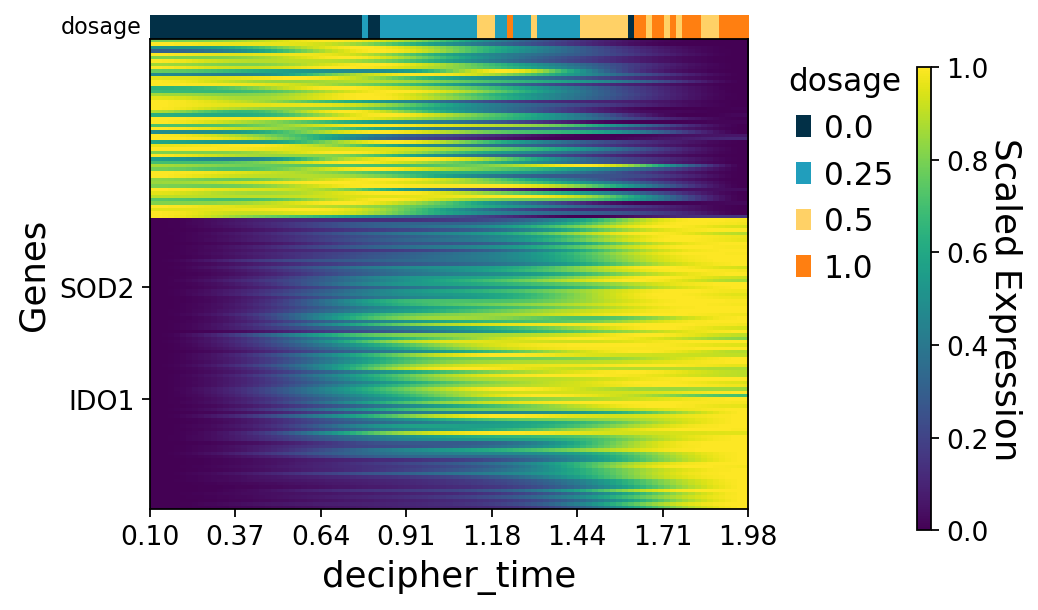

In [48]:
fig = plot_pseudotime_heatmap(NTC, modules['feature'], 'decipher_time',
                             category_keys=['dosage'],
                             category_colors=[colors],
                             genes_of_interest=['SOD2', 'IDO1', 'CD274'],
                             bar_height=0.05, smooth_sigma=10, figsize=(6, 4))

In [49]:
#save the figure
fig.savefig(f'{outdir}/pseudotime_heatmap_modules.pdf', dpi=300, bbox_inches='tight')
fig.savefig(f'{outdir}/pseudotime_heatmap_modules.png', dpi=300, bbox_inches='tight')
fig.savefig(f'{outdir}/pseudotime_heatmap_modules.svg', dpi=300, bbox_inches='tight')

2025-12-21 21:45:20,947 | INFO : maxp pruned
2025-12-21 21:45:20,950 | INFO : cmap pruned
2025-12-21 21:45:20,951 | INFO : kern dropped
2025-12-21 21:45:20,951 | INFO : post pruned
2025-12-21 21:45:20,951 | INFO : FFTM dropped
2025-12-21 21:45:20,952 | INFO : GPOS pruned
2025-12-21 21:45:20,953 | INFO : GSUB pruned
2025-12-21 21:45:20,956 | INFO : glyf pruned
2025-12-21 21:45:20,956 | INFO : Added gid0 to subset
2025-12-21 21:45:20,956 | INFO : Added first four glyphs to subset
2025-12-21 21:45:20,956 | INFO : Closing glyph list over 'GSUB': 38 glyphs before
2025-12-21 21:45:20,956 | INFO : Glyph names: ['.notdef', '.null', 'D', 'E', 'G', 'I', 'O', 'S', 'a', 'c', 'd', 'e', 'eight', 'five', 'four', 'g', 'h', 'i', 'l', 'm', 'n', 'nine', 'nonmarkingreturn', 'o', 'one', 'p', 'period', 'r', 's', 'seven', 'six', 'space', 't', 'three', 'two', 'underscore', 'x', 'zero']
2025-12-21 21:45:20,957 | INFO : Glyph IDs:   [0, 1, 2, 3, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 39, 40, 42, 44, 50, 54

2025-12-21 21:45:20,963 | INFO : gasp subsetting not needed
2025-12-21 21:45:20,963 | INFO : MATH subsetted
2025-12-21 21:45:20,964 | INFO : GDEF subsetted
2025-12-21 21:45:20,970 | INFO : GPOS subsetted
2025-12-21 21:45:20,971 | INFO : GSUB subsetted
2025-12-21 21:45:20,971 | INFO : name subsetting not needed
2025-12-21 21:45:20,972 | INFO : glyf subsetted
2025-12-21 21:45:20,972 | INFO : head pruned
2025-12-21 21:45:20,972 | INFO : OS/2 Unicode ranges pruned: [0]
2025-12-21 21:45:20,972 | INFO : OS/2 CodePage ranges pruned: [0]
2025-12-21 21:45:20,972 | INFO : glyf pruned
2025-12-21 21:45:20,973 | INFO : GDEF pruned
2025-12-21 21:45:20,973 | INFO : GPOS pruned
2025-12-21 21:45:20,973 | INFO : GSUB pruned
2025-12-21 21:45:20,974 | INFO : name pruned
